# **Deep Learning Term Project CS60010 Spring Semester 2024**
# **Task: Build encoder decoder models for Automatic Image Captioning**
# **Group ID: G-07**
# **Group Name: Optimus**

## **Methodology:**
Here's a detailed methodology for designing a Vision Encoder-Decoder model using a Vision Transformer (ViT) as the image encoder and a BERT-based text decoder, along with diagrams for each model:

1. **Vision Transformer (ViT) Model:**
   - **Overview:** The ViT model is a transformer-based architecture that processes images by dividing them into fixed-size patches and then flattening these patches to form sequences, which are then fed into a standard transformer encoder.
   - **Diagram:**
   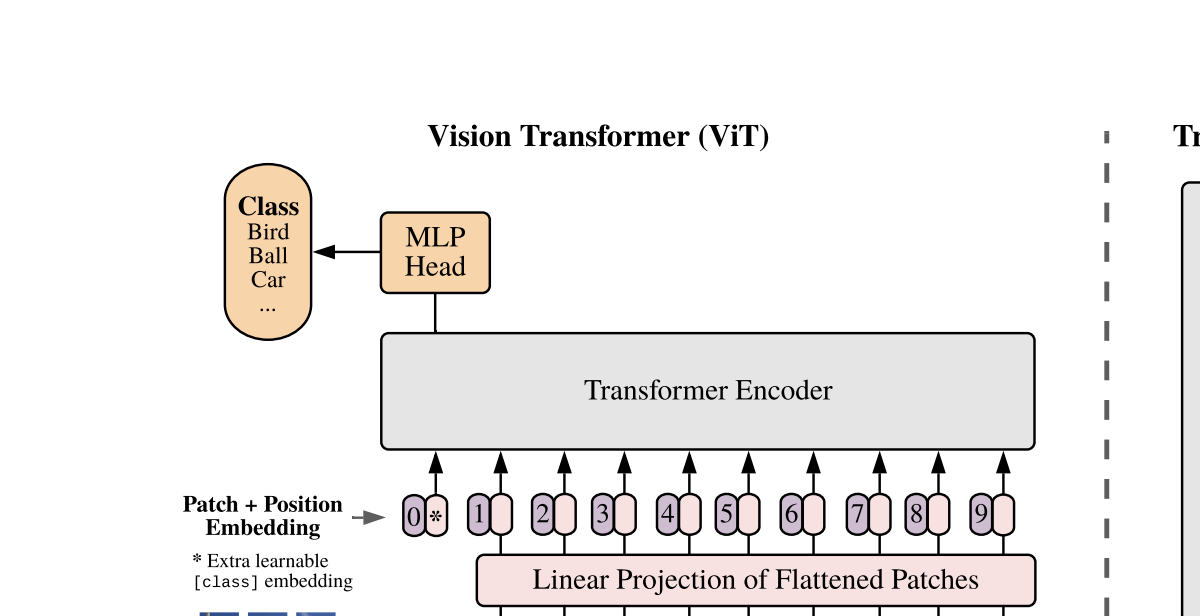

2. **BERT-based Text Decoder:**
   - **Overview:** The BERT-based text decoder is a transformer-based architecture that generates textual outputs. It uses self-attention mechanisms to capture dependencies between words and learns contextual representations.
   - **Diagram:**
    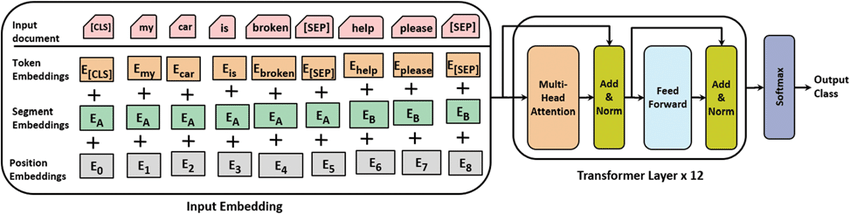

3. **Methodology Steps:**

   **Step 1: Data Loading and Preprocessing**
   - Load the image-caption dataset from CSV files (`train.csv` and `test.csv`) using pandas.
   - Preprocess images by resizing them to a fixed size and convert them into pixel values.
   - Tokenize captions using a BERT tokenizer to prepare inputs for the text decoder.

   **Step 2: Vision Transformer (ViT) for Image Encoding**
   - Initialize a ViTFeatureExtractor to extract features from images.
   - Process images using the ViT model to obtain image embeddings.

   **Step 3: BERT-based Text Decoder Configuration**
   - Initialize a BERT tokenizer for tokenizing captions and preparing inputs for the text decoder.
   - Define the architecture of the BERT-based text decoder, including the number of layers, attention heads, etc.

   **Step 4: Model Integration and Training Setup**
   - Combine the ViT image encoder and BERT-based text decoder using a VisionEncoderDecoderModel.
   - Configure the model for training by setting optimizer, learning rate, batch size, etc.
   - Prepare data loaders for training, validation, and testing using DataLoader.

   **Step 5: Training the Vision Encoder-Decoder Model**
   - Train the integrated model using the prepared data loaders and training parameters.
   - Monitor training progress using metrics such as loss and accuracy.

   **Step 6: Text Generation and Evaluation**
   - Generate captions for test images using the trained model.
   - Evaluate the generated captions using metrics such as CIDEr, ROUGE, and BLEU scores for performance assessment.

   **Step 7: Save and Deploy the Trained Model**
   - Save the trained Vision Encoder-Decoder model for future use or deployment.
   - Deploy the model for inference on new images to generate captions.


This methodology covers the entire workflow from data loading and preprocessing to model integration, training, evaluation, and deployment. It combines the power of ViT for image encoding and BERT-based text decoding to create a comprehensive Vision Encoder-Decoder model for image captioning tasks.

### **Installing necessary libraries**
**Importing Libraries:**
- `pandas` is imported as `pd` for data manipulation.
- `transformers` is imported to work with pre-trained models like Vision Transformer (ViT), BERT, and VisionEncoderDecoderModel.
- `PIL` is imported from the Python Imaging Library for image processing.
- `datasets` is imported to load datasets.
- `torch` is imported for deep learning functionalities.
- `DataLoader` and `Dataset` are imported from `torch.utils.data` for creating custom datasets and data loaders.
- `matplotlib.pyplot` is imported as `plt` for data visualization.

**Image Processing and Model Loading:**
- `ViTImageProcessor` is used to preprocess images for Vision Transformer models.
- `BertTokenizer` is used to tokenize text inputs for BERT models.
- `VisionEncoderDecoderModel` is a pre-trained model that combines vision and language understanding.
- `from_pretrained` is used to load pre-trained weights and configurations for these models.

**Loading Dataset:**
- `load_dataset` is used to load the COCO dataset from the Hugging Face datasets library.

**Using DataLoader:**
- `CustomDataset` is a custom dataset class that preprocesses images and captions for the VisionEncoderDecoderModel.
- The dataset is loaded using `load_dataset` from the COCO dataset.
- `DataLoader` is used to create a data loader with a batch size of 2 and shuffling the data.

In [ ]:
import pandas as pd
from transformers import ViTImageProcessor, BertTokenizer, VisionEncoderDecoderModel
from transformers import ViTFeatureExtractor
from PIL import Image
from transformers import ViTImageProcessor, BertTokenizer, VisionEncoderDecoderModel
from datasets import load_dataset
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
import pandas as pd
from transformers import ViTFeatureExtractor
from transformers import ViTImageProcessor, BertTokenizer, VisionEncoderDecoderModel
from PIL import Image
import pandas as pd
import random
import matplotlib.pyplot as plt
from transformers import ViTImageProcessor, BertTokenizer, VisionEncoderDecoderModel
from datasets import load_dataset
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd

1. `train_df = pd.read_csv("/kaggle/input/caption/custom_captions_dataset/train.csv")`: Reads a CSV file located at "/kaggle/input/caption/custom_captions_dataset/train.csv" into a pandas DataFrame named `train_df`.
2. `test_df = pd.read_csv("/kaggle/input/caption/custom_captions_dataset/test.csv")`: Reads a CSV file located at "/kaggle/input/caption/custom_captions_dataset/test.csv" into a pandas DataFrame named `test_df`.

These lines essentially import the pandas library and use it to read CSV files into DataFrames, one for training data (`train_df`) and another for test data (`test_df`).

In [ ]:
import pandas as pd
train_df =  pd.read_csv("/kaggle/input/caption/custom_captions_dataset/train.csv")
test_df =  pd.read_csv("/kaggle/input/caption/custom_captions_dataset/test.csv")

Printing sample filename

In [ ]:
train_df["filename"].values[0]

'train_1.jpg'

Printing sample caption

In [ ]:
train_df["caption"].values[0]

'A white round plate is on a table with a plastic tablecloth on it.  Two foil covered food halves are on the white plate along with a serving of golden yellow french fries.  Next to the white plate in a short,  topless, plastic container is a white sauce.  Diagonal to the white plate are the edges of several other stacked plates.  There are black shadows reflected on the table.'

### **Loading Custom Dataset and Images for Vision and Language Tasks**

This code snippet is designed to load a custom dataset for vision and language tasks. Here's a breakdown of what each part does:

1. **Loading Dataset Function (`load_dataset`):**
   - Inputs: Accepts a pandas DataFrame (`dataframe`) containing information about images and their captions.
   - Outputs: Returns a dictionary (`dataset`) containing two keys: 'test' and their corresponding values.
     - 'test': Contains a sub-dictionary with two keys:
       - 'caption': A list of captions extracted from the DataFrame using `dataframe['caption'].tolist()`.
       - 'image': A list of file paths for images, generated by appending filenames from the DataFrame to a base path (`/kaggle/input/caption/custom_captions_dataset/train/`).
   
2. **Loading Image Function (`load_image`):**
   - Inputs: Accepts a file path (`filepath`) as input.
   - Outputs: Opens the image file at the specified path using `Image.open(filepath)` from the PIL library and converts it to RGB mode using `.convert("RGB")`.
   - Returns the loaded image.

3. **Execution:**
   - Calls the `load_dataset(train_df)` function to load the dataset from a DataFrame named `train_df`.
   - Assigns the loaded dataset to the variable `dataset`.

This code structure facilitates the loading of image-caption datasets for subsequent use in training models, particularly those that combine vision and language understanding, such as the VisionEncoderDecoderModel.

In [ ]:
from transformers import ViTFeatureExtractor
from transformers import ViTImageProcessor, BertTokenizer, VisionEncoderDecoderModel
from PIL import Image

# Load dataset
def load_dataset(dataframe):
    dataset = {
        'test': {
            'caption': dataframe['caption'].tolist(),
            'image': [f"/kaggle/input/caption/custom_captions_dataset/train/{filename}" for filename in dataframe['filename']]
        }
    }
    return dataset

# Load image from filepath
def load_image(filepath):
    with Image.open(filepath) as img:
        return img.convert("RGB")

dataset = load_dataset(train_df)

### **Displaying Random Image with Caption**

This function displays a random image and its corresponding caption from a given dataset. Here's how it works:

1. **Inputs:**
   - `dataset`: The dataset containing image paths and captions.
   - `image_size`: The size of the displayed image (default is 25x25 inches).
   - `caption_size`: The font size of the caption text (default is 40).

2. **Process:**
   - Generates a random index within the range of images in the dataset using `random.randint(0, len(dataset['test']['image']) - 1)`.
   - Retrieves the image path and caption corresponding to the random index.
   - Loads the image using the `load_image` function.
   - Splits the caption into lines after each full stop ('.').
   - Prepares the caption text for display by joining the lines with newline characters ('\n').

3. **Display:**
   - Creates a figure with an adjustable size based on `image_size`.
   - Displays the image using `plt.imshow(img)` and removes the axis using `plt.axis('off')`.
   - Sets the size of the figure using `plt.gcf().set_size_inches(*image_size)`.
   - Displays the caption text below the image with an adjustable font size (`caption_size`) and alignment using `plt.text`.
   - Adjusts the layout to ensure proper spacing using `plt.tight_layout()`.
   - Shows the image and caption using `plt.show()`.

This function is useful for visualizing random images from a dataset along with their captions, providing a quick way to inspect the data and understand the content associated with each image.

In [ ]:
import random
import matplotlib.pyplot as plt

# Function to display a random image and its caption with adjustable size
def display_random_image(dataset, image_size=(25, 25), caption_size=40):
    plt.figure(figsize=(25, 25))  # Adjusted figure size
    random_index = random.randint(0, len(dataset['test']['image']) - 1)
    image_path = dataset['test']['image'][random_index]
    caption = dataset['test']['caption'][random_index]
    img = load_image(image_path)

    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.gcf().set_size_inches(*image_size)  # Adjustable image size

    # Split caption into lines after each full stop
    lines = []
    line = ""
    for char in caption:
        line += char
        if char == '.':
            lines.append(line)
            line = ""

    caption_display = '\n'.join(lines)

    plt.text(0.5, -0.1, caption_display, fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

### Displaying **sample images and their captions**

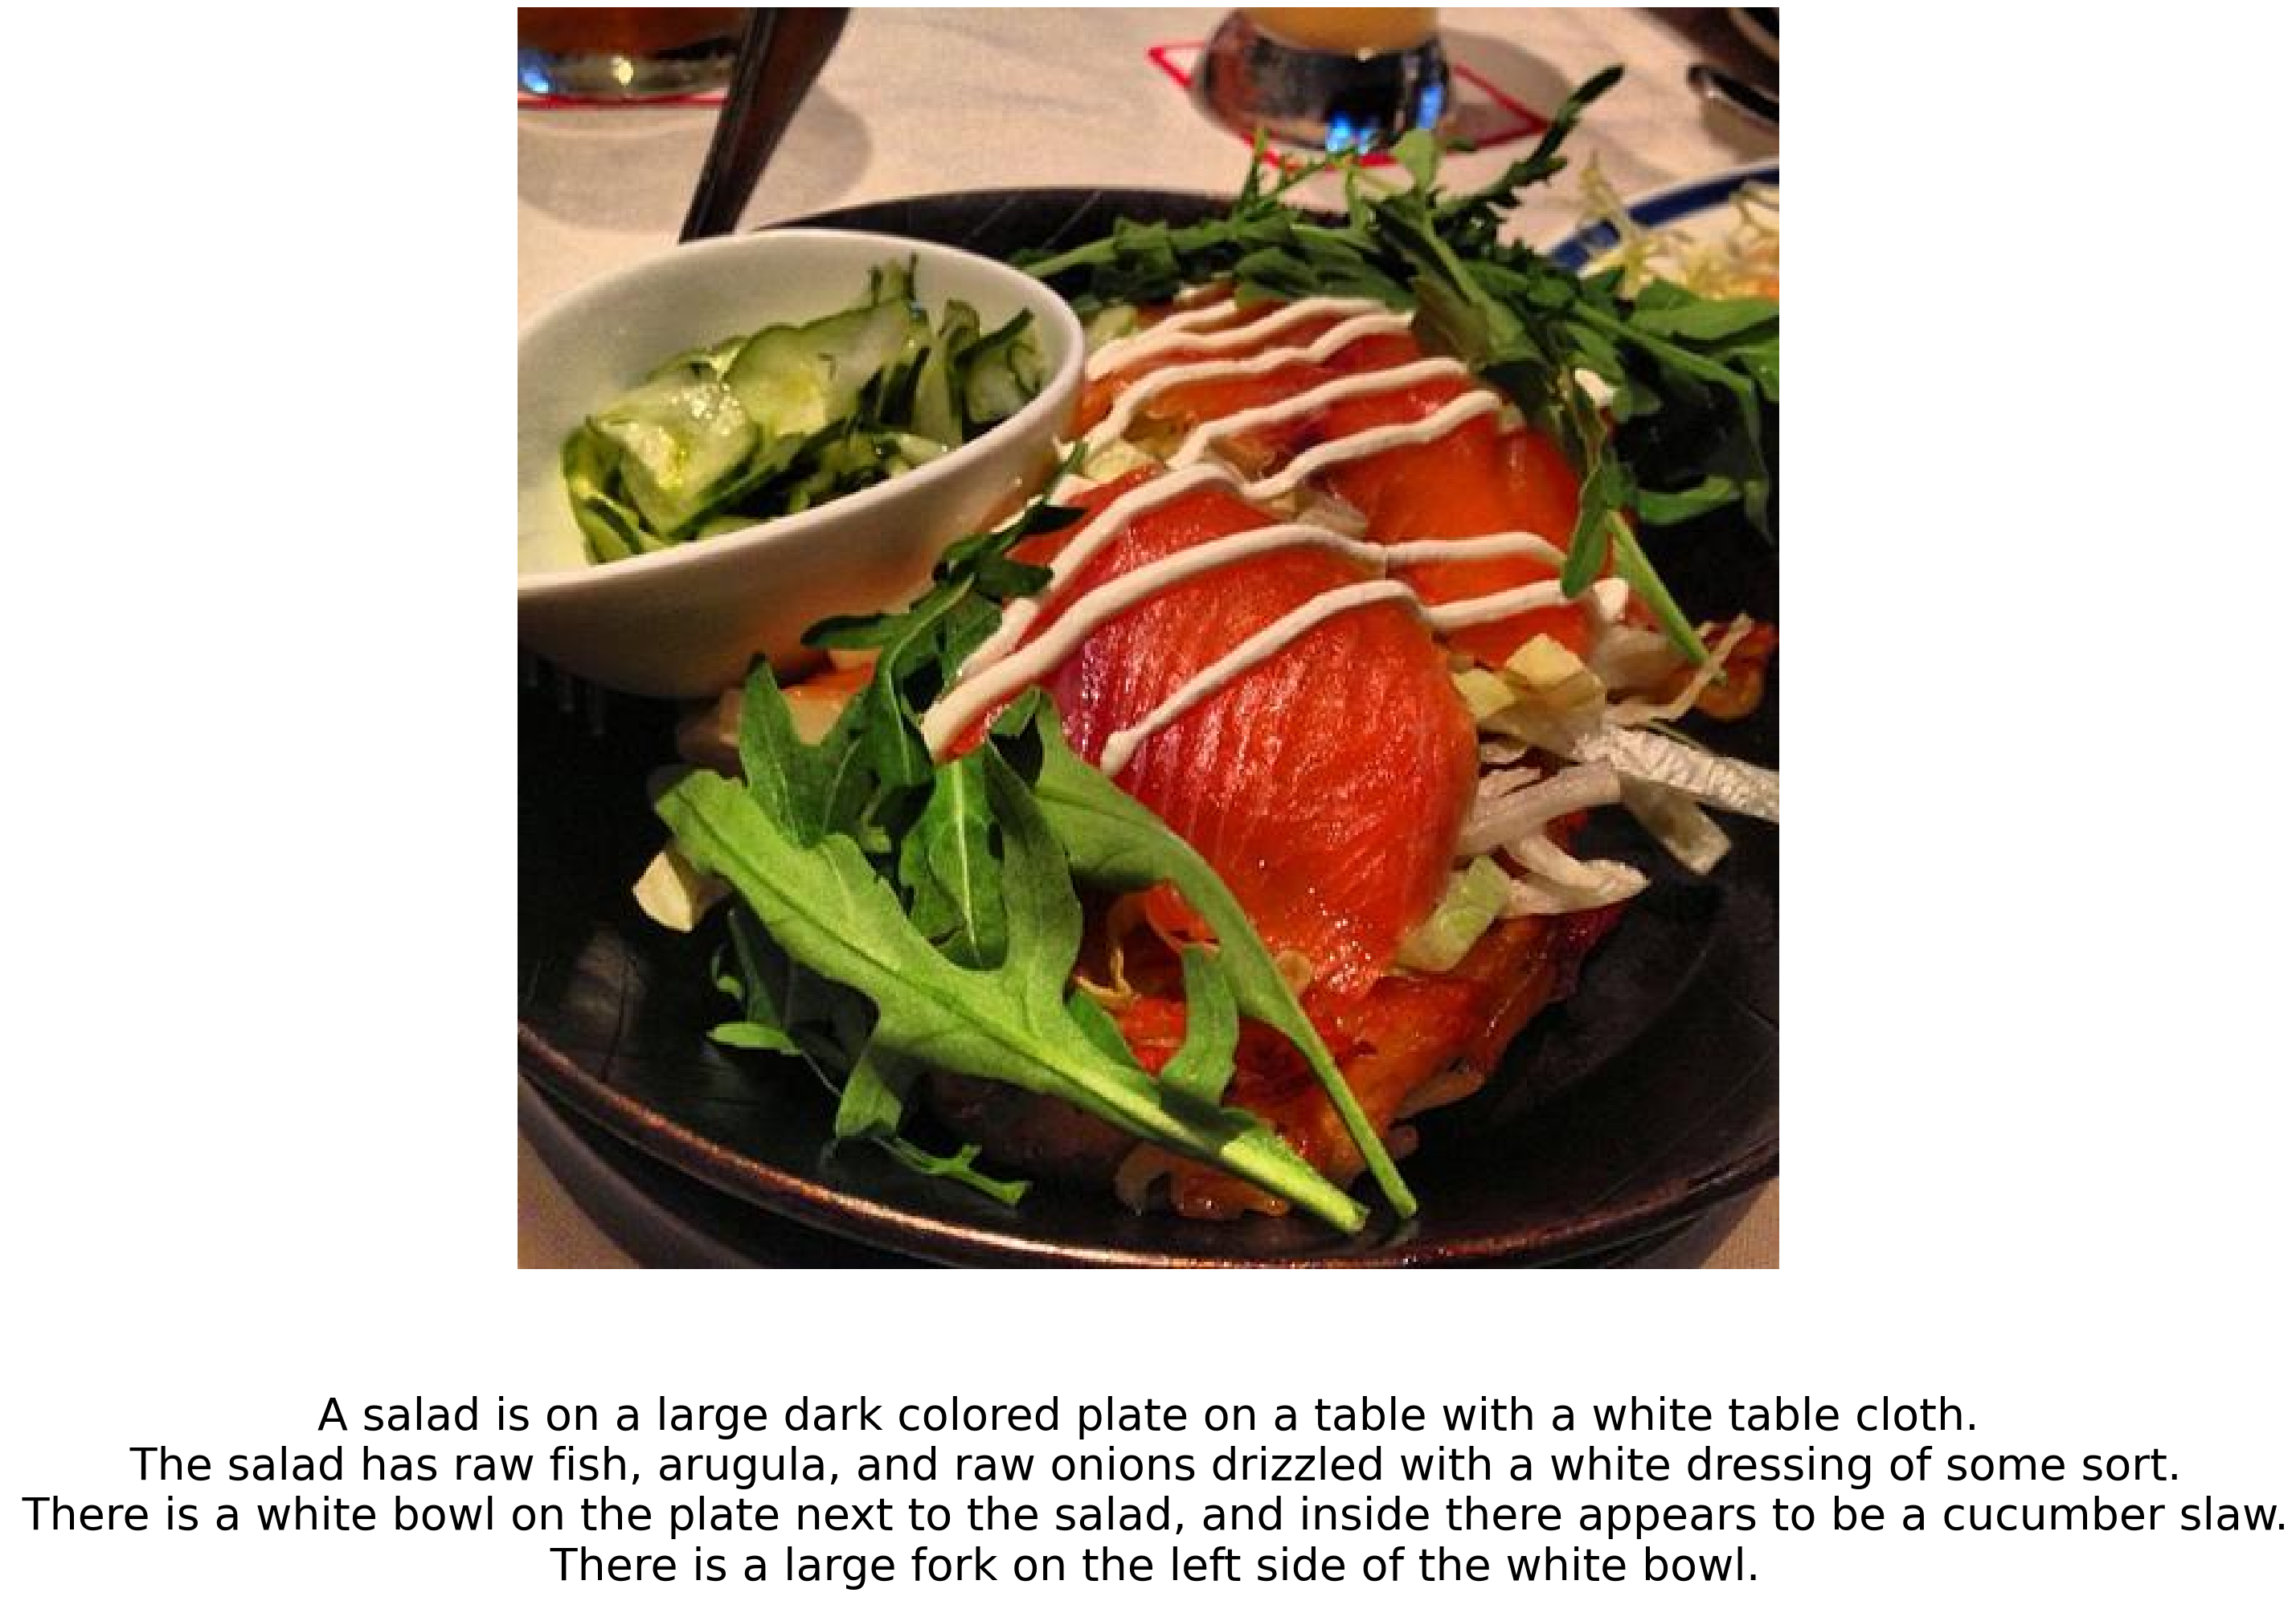

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

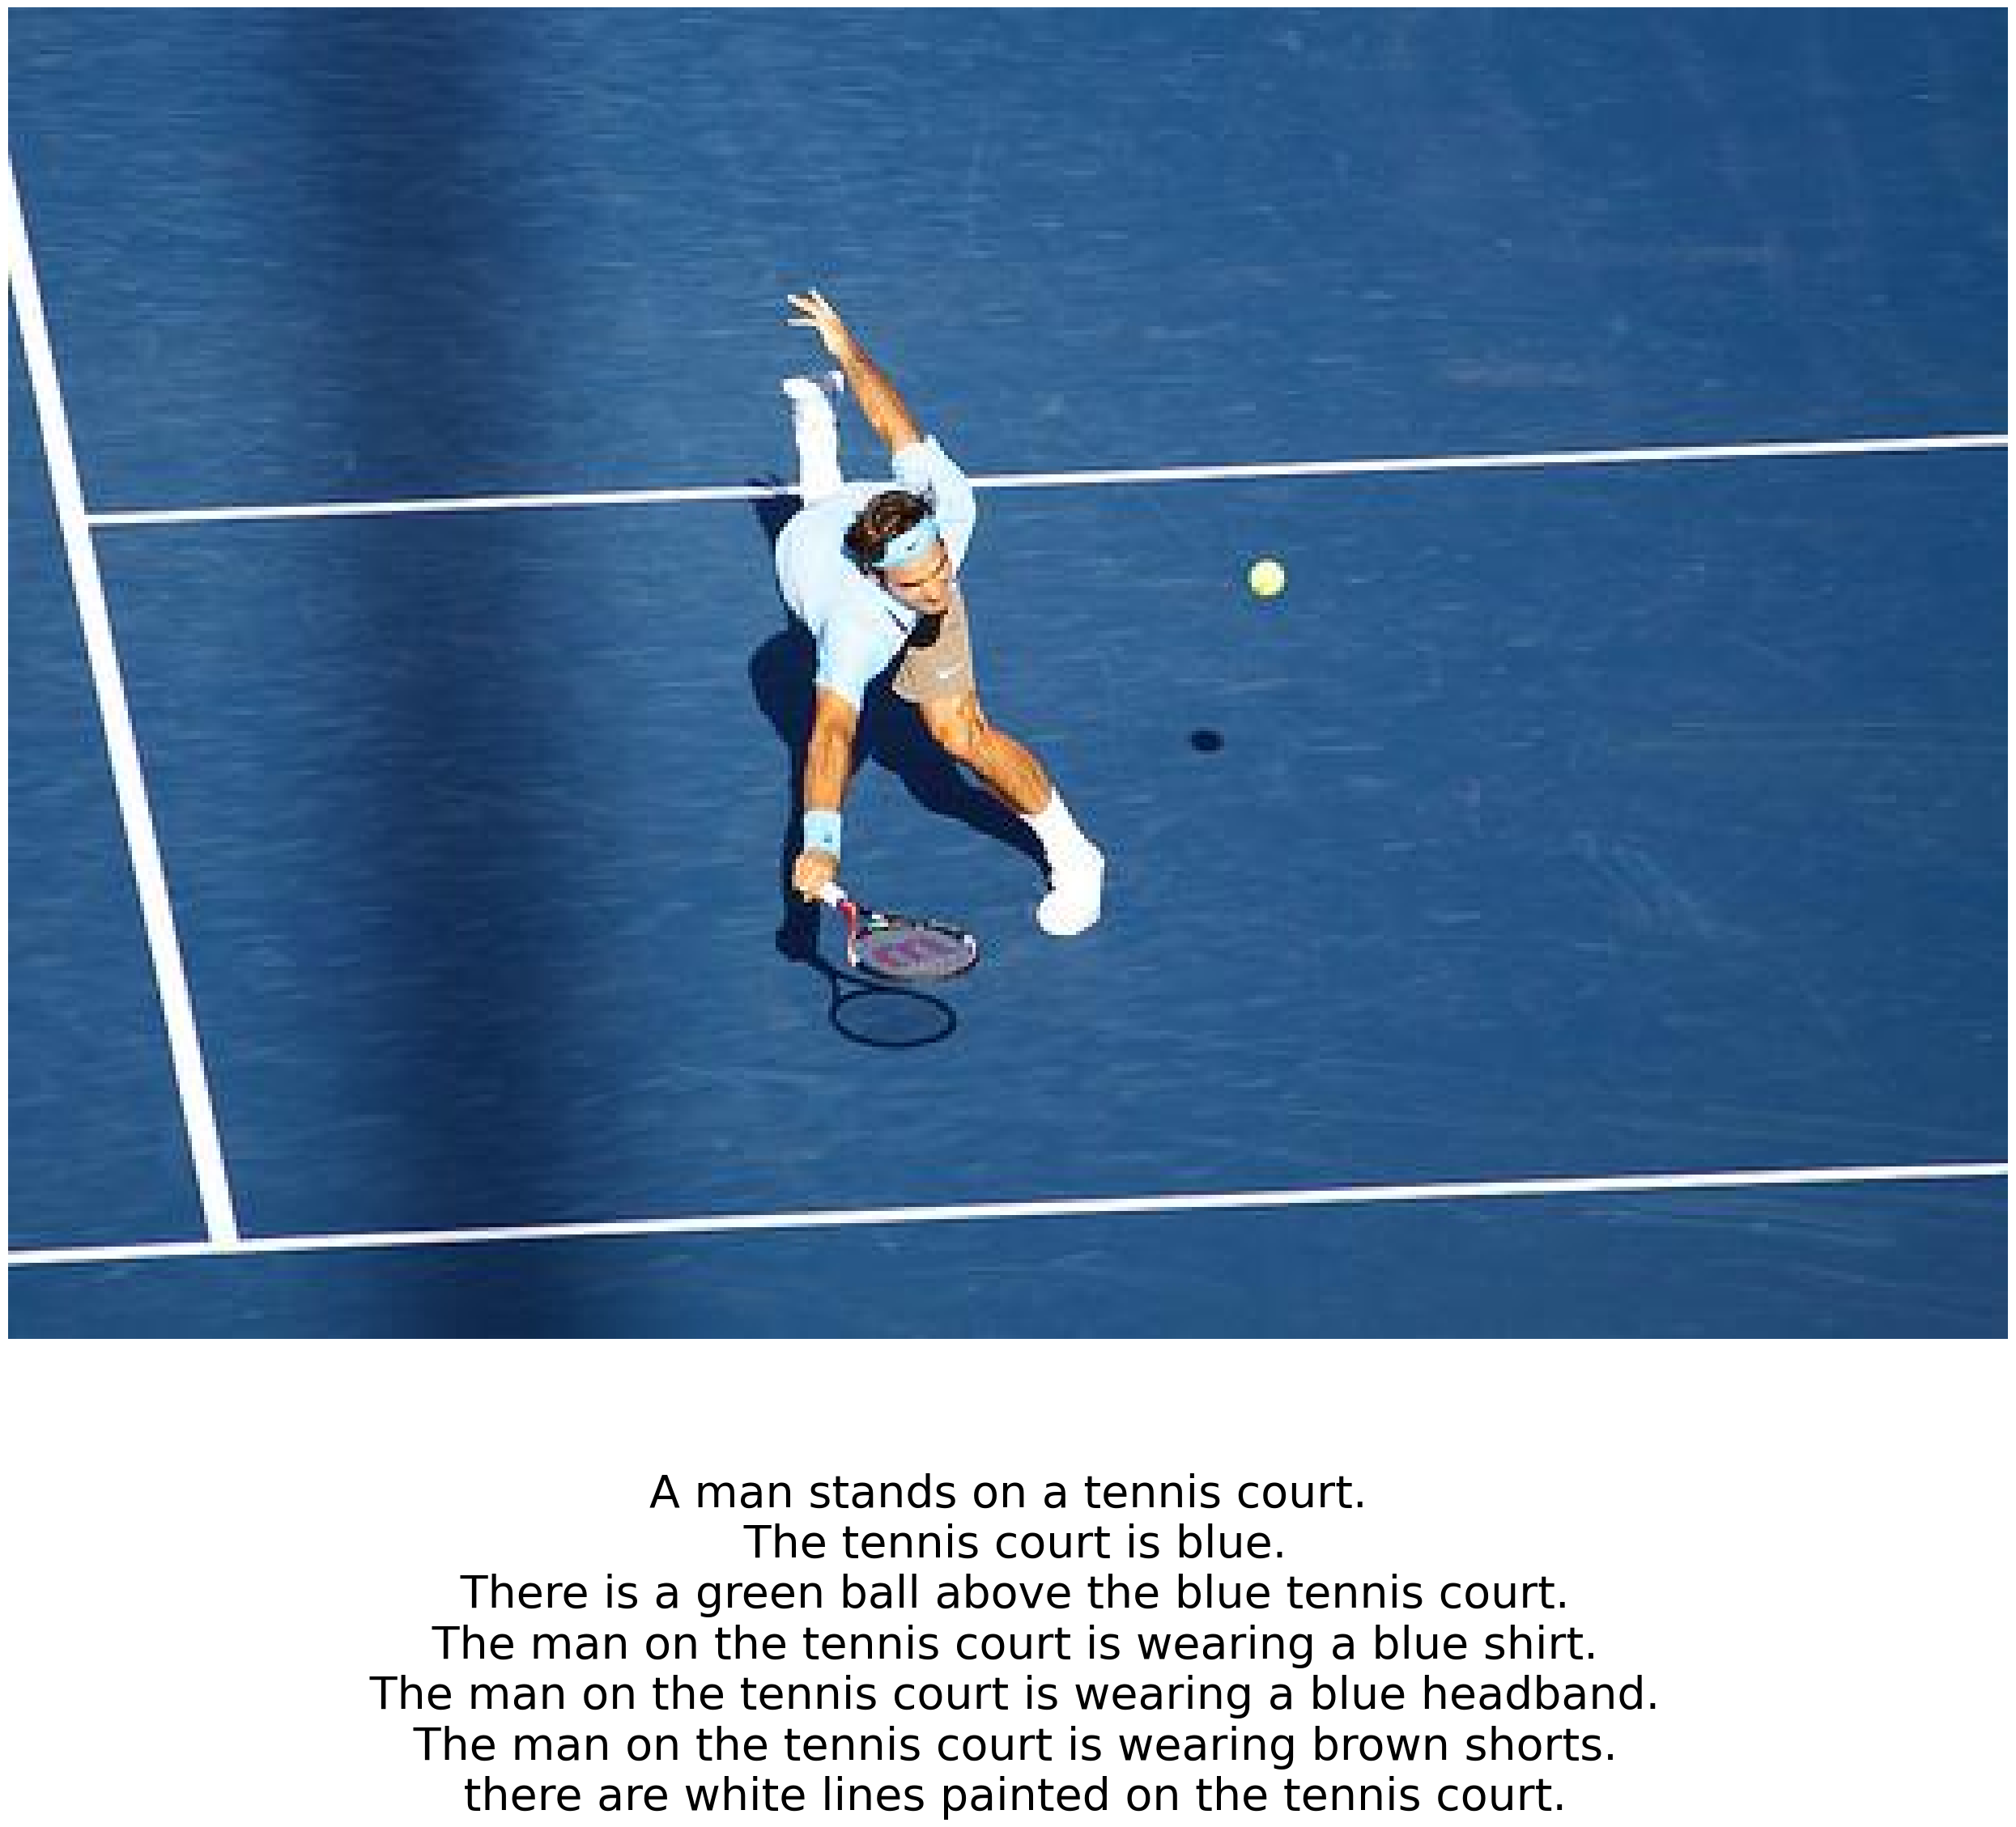

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

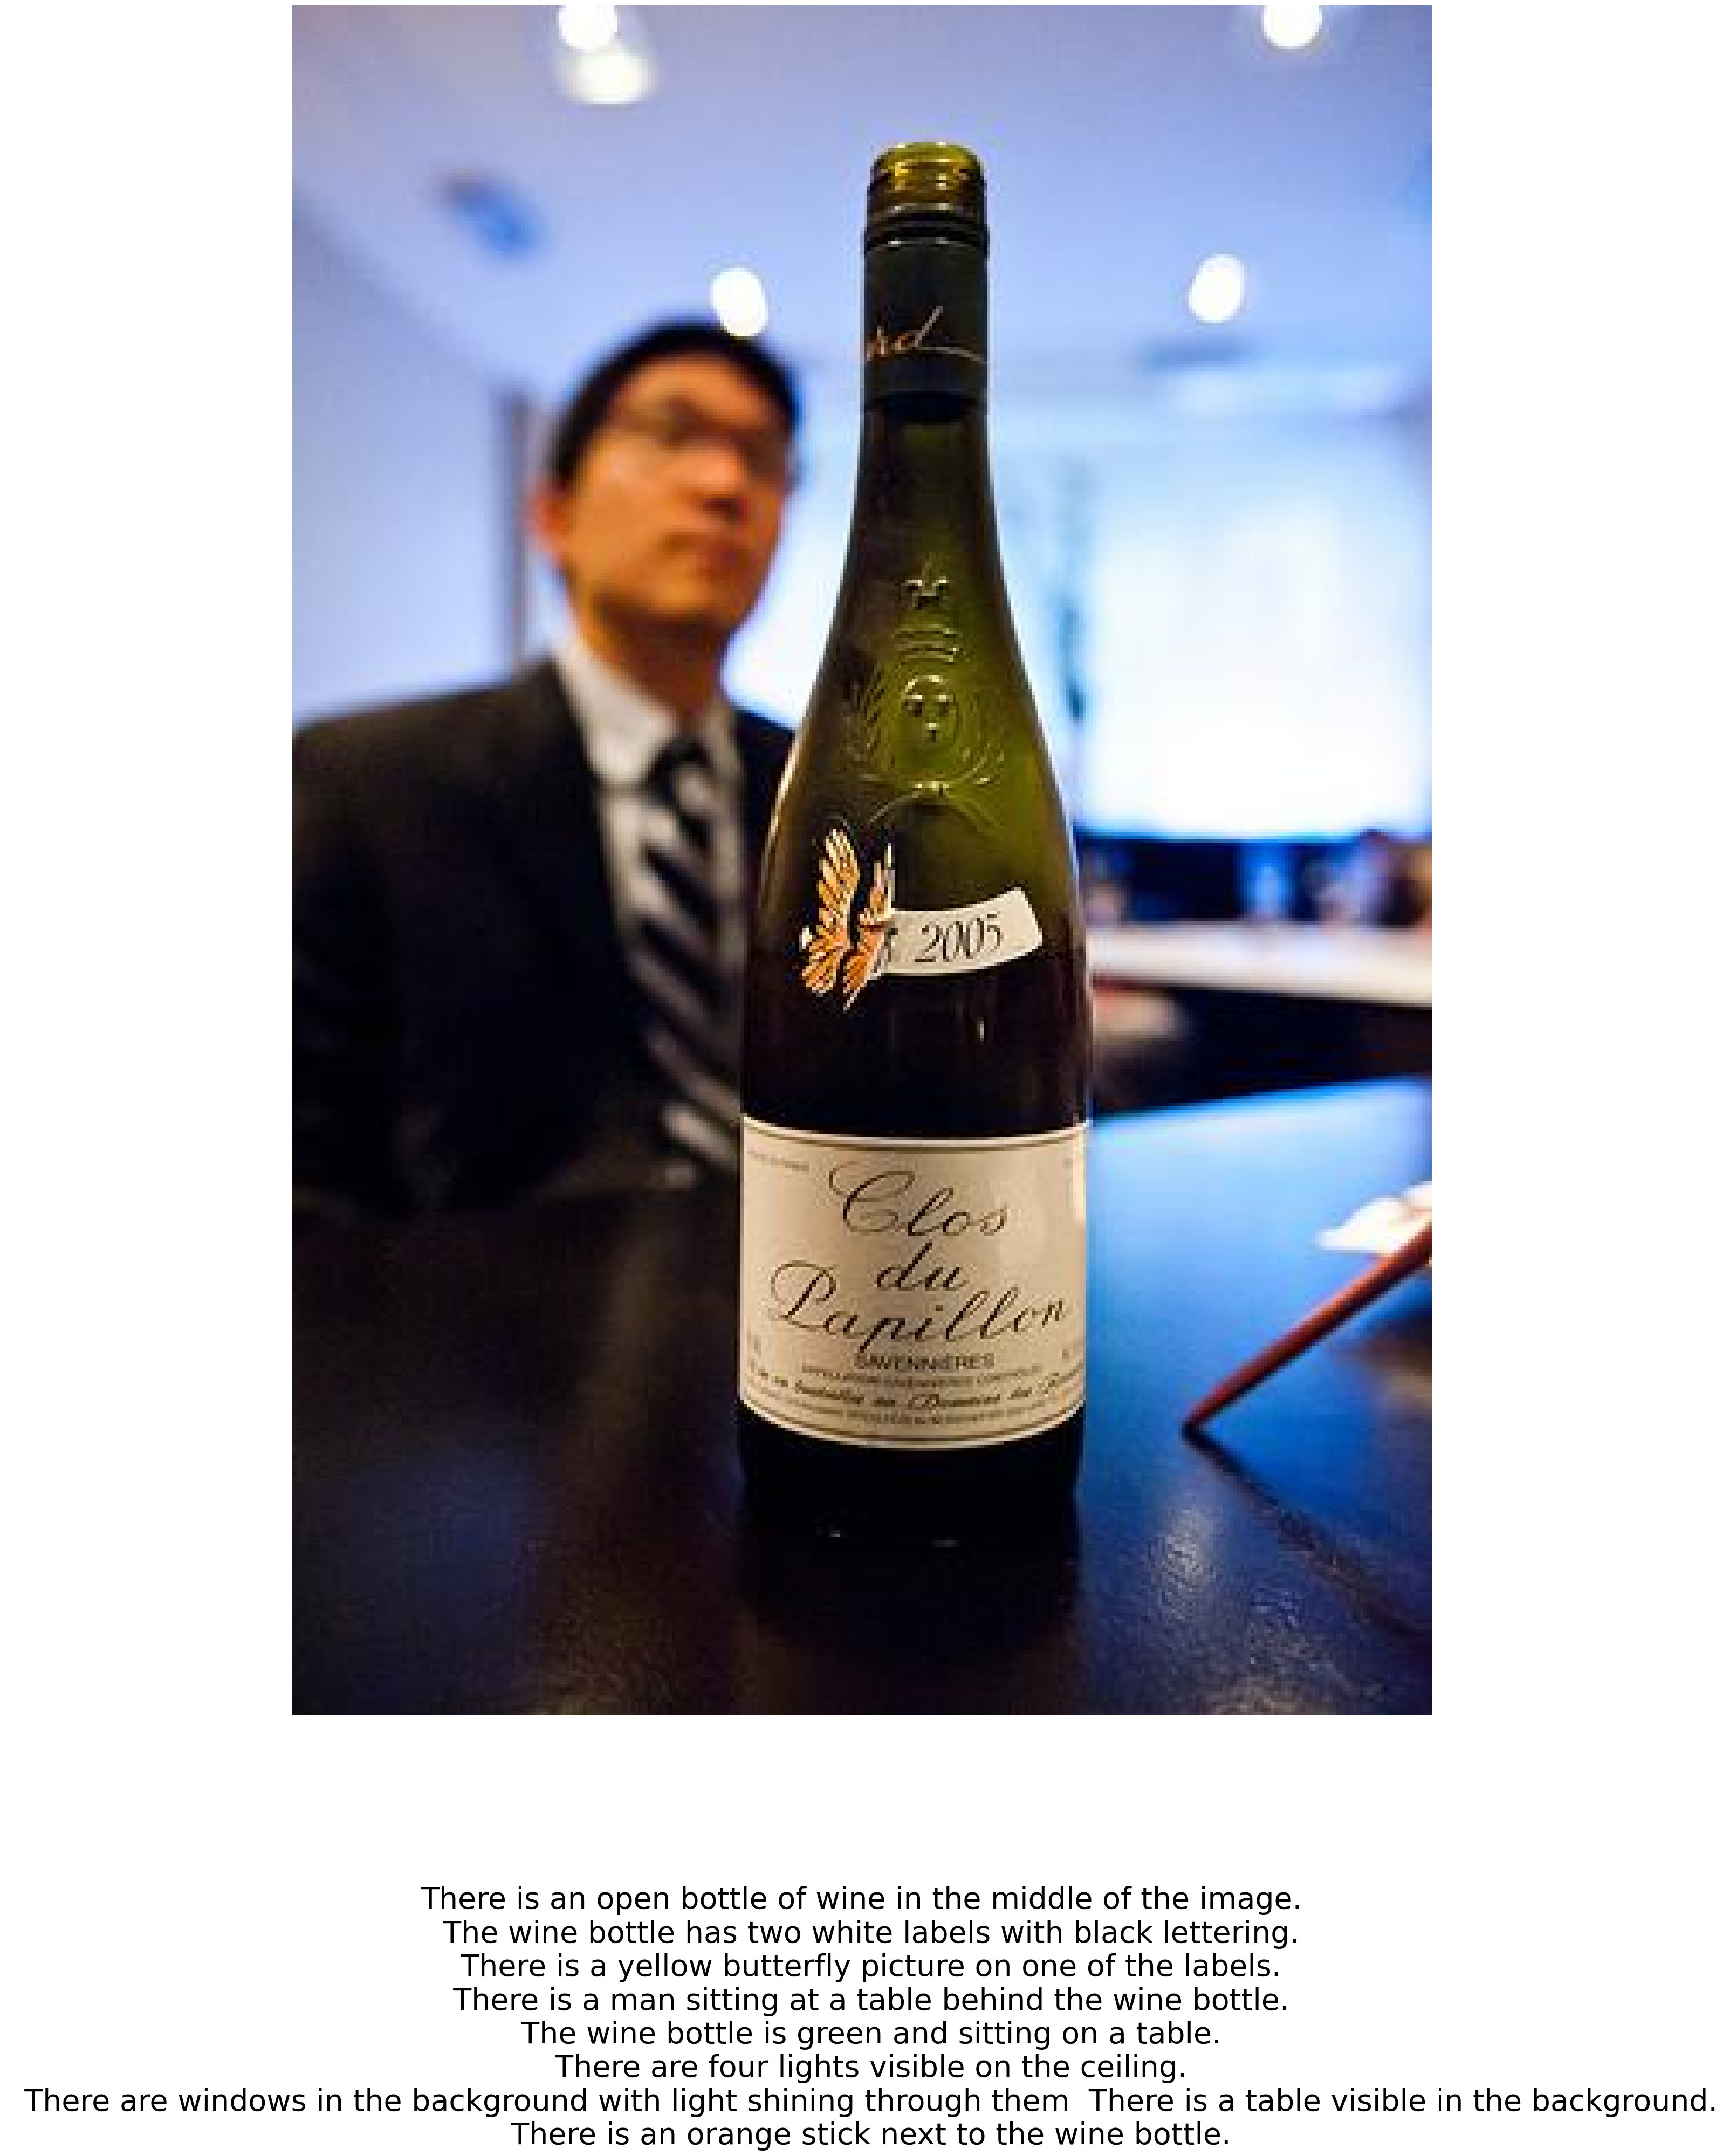

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(40, 40), caption_size=40)

### **Preprocessing Images Using Vision Transformer Feature Extractor**

This code segment demonstrates how to use a Vision Transformer (ViT) feature extractor to preprocess images and extract their pixel values. Here's a breakdown of the code:

1. **Loading the ViT Feature Extractor:**
   - Imports the ViTFeatureExtractor from the transformers library.
   - Loads the ViT feature extractor model "google/vit-base-patch16-224-in21k" using `ViTFeatureExtractor.from_pretrained()`.

2. **Initializing Processed Images List:**
   - Creates an empty list `processed_images` to store the processed pixel values of all images.

3. **Iterating Through Image Filepaths and Preprocessing:**
   - Iterates through each image filepath in the 'test' subset of the dataset.
   - Loads and preprocesses each image using the `load_image` function to obtain the image object `img`.
   - Utilizes the ViT feature extractor to preprocess the image and obtain its pixel values using `image_processor(images=img, return_tensors="pt").pixel_values`.
   - Appends the processed pixel values to the `processed_images` list.

4. **Execution:**
   - The code segment processes all images in the 'test' subset of the dataset and stores their preprocessed pixel values in the `processed_images` list.

This code is useful for preparing images for further processing or analysis using Vision Transformer-based models, such as fine-tuning on specific tasks or extracting image features for downstream tasks like image classification or captioning.

In [ ]:
# Load the ViT feature extractor
image_processor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

# Initialize a list to store the processed pixel values of all images
processed_images = []

# Iterate through each image filepath in the dataset
for filepath in dataset['test']['image']:
    # Load and preprocess the image
    img = load_image(filepath)

    # Preprocess the image to get pixel values
    pixel_values = image_processor(images=img, return_tensors="pt").pixel_values
    processed_images.append(pixel_values)


### **Tokenizing Captions Using BERT Tokenizer**

This code snippet demonstrates how to tokenize captions using a BERT tokenizer. Here's a breakdown of the code:

1. **Loading BERT Tokenizer:**
   - Imports the BertTokenizer from the transformers library.
   - Loads the BERT tokenizer model "google-bert/bert-base-uncased" using `BertTokenizer.from_pretrained()`.

2. **Tokenizing Captions:**
   - Initializes an empty list `decoder_outputs` to store the tokenized labels of captions.
   - Iterates through the processed images in the `processed_images` list.
   - Tokenizes each caption from the 'test' subset of the dataset using the BERT tokenizer with options for padding to the maximum length.
   - Appends the tokenized labels (`input_ids`) to the `decoder_outputs` list.

3. **Prints Example Output:**
   - Prints the tokenized labels (`input_ids`) of the first caption in the 'test' subset to demonstrate the tokenization process.

This code segment showcases how to use a BERT tokenizer to convert text data, such as captions, into tokenized representations suitable for input to BERT-based models.

In [ ]:
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")
decoder_outputs=[]
for i in range (0,len(processed_images)):
    labels = tokenizer(
        dataset['test']['caption'][i],
        return_tensors="pt",
        padding="max_length",
    ).input_ids
    decoder_outputs.append(labels)
print(decoder_outputs[0])

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tensor([[  101,  1037,  2317,  2461,  5127,  2003,  2006,  1037,  2795,  2007,
          1037,  6081,  2795, 23095,  2006,  2009,  1012,  2048, 17910,  3139,
          2833, 23672,  2024,  2006,  1996,  2317,  5127,  2247,  2007,  1037,
          3529,  1997,  3585,  3756,  2413, 22201,  1012,  2279,  2000,  1996,
          2317,  5127,  1999,  1037,  2460,  1010,  2327,  3238,  1010,  6081,
         11661,  2003,  1037,  2317, 12901,  1012, 19754,  2000,  1996,  2317,
          5127,  2024,  1996,  7926,  1997,  2195,  2060, 16934,  7766,  1012,
          2045,  2024,  2304,  6281,  7686,  2006,  1996,  2795,  1012,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

**Creating a Vision Encoder-Decoder Model**

This code snippet demonstrates how to create a Vision Encoder-Decoder model by combining a Vision Transformer (ViT) encoder with a BERT-based decoder. Here's a breakdown of the code:

1. **Initializing the Vision Encoder-Decoder Model:**
   - Imports the VisionEncoderDecoderModel from the transformers library.
   - Creates a VisionEncoderDecoderModel instance by loading the pre-trained ViT encoder ("google/vit-base-patch16-224-in21k") and BERT-based decoder ("google-bert/bert-base-uncased") using `from_encoder_decoder_pretrained()`.

2. **Configuring Model Parameters:**
   - Sets the decoder's start token ID and padding token ID in the model configuration to match those from the BERT tokenizer using `model.config.decoder_start_token_id` and `model.config.pad_token_id`.
   - These settings ensure compatibility between the model and the tokenizer for proper input and output handling.

3. **Calculating Loss:**
   - Calculates the loss using the model by passing processed images and tokenized labels (decoder outputs) as inputs to the model's forward method (`model(pixel_values=processed_images[0], labels=decoder_outputs[0])`).
   - Retrieves the loss value using `.loss` from the returned output.

This code segment illustrates how to set up a Vision Encoder-Decoder model using pre-trained components and configure it for further training or inference tasks, such as image captioning or generation.

In [ ]:
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    "google/vit-base-patch16-224-in21k", "google-bert/bert-base-uncased"
)

model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
loss = model(pixel_values=processed_images[0], labels=decoder_outputs[0]).loss

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertLMHeadModel were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['bert.encoder.layer.0.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.0.crossattention.output.dense.bias', 'bert.encoder.layer.0.crossattention.output.dense.weight', 'bert.encoder.layer.0.crossattention.self.key.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.value.bias', 'bert.encoder.layer.0.crossattention.self.value.weight', 'bert.encoder.layer.1.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.1.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.1.crossattention.output.dense.bias', 'bert.encoder.layer.1.crossattention.output.dense.weight', 'bert.encoder.layer.1.crossattention.self.key.bi

Printing loss before training model

In [ ]:
print(loss)

tensor(10.5605, grad_fn=<NllLossBackward0>)


### **Setting Up Training Parameters and Optimizer**

This section of the code focuses on setting up training parameters and defining an optimizer for the Vision Encoder-Decoder model. Here's the explanation:

1. **Training Parameters:**
   - `num_epochs`: Specifies the number of training epochs, which determines how many times the entire dataset is passed through the model during training.
   - `batch_size`: Defines the batch size, indicating the number of data samples processed in each iteration during training.
   - `learning_rate`: Sets the learning rate for the optimizer, determining the step size for updating model parameters during training.

2. **Device Selection:**
   - Checks if a CUDA-enabled GPU is available (`torch.cuda.is_available()`) and assigns the device accordingly (`device=torch.device("cuda")`). If no GPU is available, it defaults to the CPU.
   - Moving the model to the selected device (`model.to(device)`) ensures that computations are performed on the chosen hardware (GPU or CPU).

3. **Optimizer and Loss Function:**
   - Initializes the AdamW optimizer (`torch.optim.AdamW`) with the model parameters (`model.parameters()`) and the specified learning rate (`lr=learning_rate`).
   - Chooses the CrossEntropyLoss (`torch.nn.CrossEntropyLoss()`) as the loss function, suitable for multi-class classification tasks like image captioning.

These configurations are crucial for training the Vision Encoder-Decoder model effectively, controlling the training process with defined epochs, batch size, and learning rate, while optimizing model parameters using the AdamW optimizer and calculating loss using CrossEntropyLoss.

In [ ]:
from transformers import ViTImageProcessor, BertTokenizer, VisionEncoderDecoderModel
from datasets import load_dataset
import torch
from torch.utils.data import DataLoader
num_epochs = 15
batch_size = 2
learning_rate = 1e-4

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

### **Custom Dataset and DataLoader Setup**

This section illustrates the creation of a custom dataset class (`CustomImageTextDataset`) and setting up a DataLoader (`train_loader`) for training the Vision Encoder-Decoder model. Here's the breakdown:

1. **Custom Dataset Class:**
   - `CustomImageTextDataset` is defined as a subclass of `torch.utils.data.Dataset`.
   - In the constructor (`__init__`), it initializes with parameters such as `dataframe`, `processed_images`, and `decoder_outputs`.
   - The `__len__` method returns the length of the dataset, which is the number of samples in the dataframe.
   - The `__getitem__` method retrieves a sample by index (`idx`) and returns a dictionary containing the image (`'image'`) and its corresponding labels (`'labels'`).

2. **DataLoader Setup:**
   - The `collate_fn` function is defined to collate individual samples into batches in the DataLoader. It stacks image pixel values and labels from each sample into tensors.
   - A `CustomImageTextDataset` instance (`custom_dataset`) is created with the provided `train_df`, `processed_images`, and `decoder_outputs`.
   - The DataLoader (`train_loader`) is set up with the custom dataset, specifying the batch size (`batch_size`), collate function (`collate_fn`), and enabling shuffling (`shuffle=True`) to randomize the order of batches during training.

This setup prepares the data pipeline for training the Vision Encoder-Decoder model, organizing samples into batches and handling data loading efficiently during training iterations.

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd

# Prepare DataLoader
def collate_fn(batch):
    pixel_values = torch.stack([item['image'] for item in batch])
    labels = torch.stack([item['labels'] for item in batch])
    # Add other data fields as needed
    return {'pixel_values': pixel_values, 'labels': labels}


class CustomImageTextDataset(Dataset):
    def __init__(self, dataframe,processed_images,decoder_outputs):
        self.dataframe = dataframe
        self.processed_images = processed_images
        self.decoder_outputs = decoder_outputs

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        return {
            'image': self.processed_images[idx][0],
            'labels': self.decoder_outputs[idx][0]
        }

# Assuming `train_df` is your dataframe, `image_processor` is your ViT image processor, and `tokenizer` is your BERT tokenizer
custom_dataset = CustomImageTextDataset(train_df,processed_images,decoder_outputs)
train_loader = DataLoader(custom_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)

### **Vision Encoder-Decoder Model Training Loop**

The following code snippet represents the training loop for the Vision Encoder-Decoder model. Here's the explanation:

1. **Training Loop:**
   - The loop iterates over the specified number of epochs (`num_epochs`), indicating the number of times the entire dataset is processed.
   - Within each epoch, the model is set to training mode (`model.train()`) to enable gradient computation and parameter updates.
   - A variable `total_loss` is initialized to track the cumulative loss across batches within an epoch.

2. **Batch Processing:**
   - The training data is processed in batches using the DataLoader (`train_loader`), which yields batches of data samples during each iteration of the loop.
   - Each batch is moved to the selected device (`device`) using a dictionary comprehension (`{k: v.to(device) for k, v in batch.items()}`) to ensure computations are performed on the appropriate hardware (GPU or CPU).

3. **Forward Pass and Loss Computation:**
   - The batch data is passed through the model (`outputs = model(**batch)`) to obtain model predictions.
   - The loss is computed using the specified loss function (`criterion`) by comparing the model predictions (`outputs.logits`) with the actual labels (`batch["labels"]`).

4. **Backward Pass and Optimization:**
   - The optimizer's gradients are reset to zero (`optimizer.zero_grad()`) before performing the backward pass (`loss.backward()`) to compute gradients for all trainable parameters.
   - The optimizer then updates the model's parameters based on the computed gradients (`optimizer.step()`).

5. **Logging and Monitoring:**
   - The total loss for each batch is accumulated in `total_loss` to calculate the average loss for the epoch (`avg_loss = total_loss / len(train_loader)`).
   - The average loss for each epoch is printed to monitor the training progress (`print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")`).

This training loop efficiently processes the data, computes gradients, and updates the model parameters, iterating through multiple epochs to optimize the Vision Encoder-Decoder model for image captioning or similar tasks.

In [ ]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in train_loader:
#         print("here")
        # Move batch to device
        batch = {k: v.to(device) for k, v in batch.items()}
        # print(batch)
        # Forward pass
        outputs = model(**batch)

        # Compute loss
        loss = criterion(outputs.logits.view(-1, outputs.logits.shape[-1]), batch["labels"].view(-1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print average loss for epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/15, Loss: 0.4457
Epoch 2/15, Loss: 0.3509
Epoch 3/15, Loss: 0.3142
Epoch 4/15, Loss: 0.2806
Epoch 5/15, Loss: 0.2456
Epoch 6/15, Loss: 0.2114
Epoch 7/15, Loss: 0.1766
Epoch 8/15, Loss: 0.1454
Epoch 9/15, Loss: 0.1189
Epoch 10/15, Loss: 0.0984
Epoch 11/15, Loss: 0.0824
Epoch 12/15, Loss: 0.0706
Epoch 13/15, Loss: 0.0616
Epoch 14/15, Loss: 0.0547
Epoch 15/15, Loss: 0.0527


### **Generating Text for a Single Image**

This code snippet demonstrates how to use the trained Vision Encoder-Decoder model to generate text for a single image. Here's the breakdown:

1. **Setting Generation Configuration:**
   - The generation configuration is adjusted to specify the decoder's start token ID (`decoder_start_token_id`) using the BERT tokenizer's classification token ID (`tokenizer.cls_token_id`). This ensures proper decoding of generated text.

2. **Generating Text:**
   - The model's `generate` method is used to generate text for the image at index 504 in the processed images (`processed_images[504]`).
   - The `max_length` parameter is set to 50, limiting the maximum length of the generated text to avoid overly long outputs.

3. **Decoding Generated Output:**
   - The generated output tokens (`output[0]`) are decoded using the BERT tokenizer to obtain the generated text (`output_text`) without special tokens (`skip_special_tokens=True`).

4. **Printing Generated Text:**
   - The generated text (`output_text`) is printed to the console for examination or further processing.

This process showcases how the Vision Encoder-Decoder model can be used to generate textual descriptions or captions for images, providing a valuable tool for tasks such as image captioning and content generation.

In [ ]:
# Generate text for a single image
model.generation_config.decoder_start_token_id = tokenizer.cls_token_id
output = model.generate(pixel_values=processed_images[504].to(device), max_length=50)

# Decode the output tokens
output_text = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated text:", output_text)

Generated text: a living room with a long table in it. a picture is hanging on the wall above the television. there is a lamp on top of the television. there is a lamp on the table. a man is sitting at the table. a


### **Saving Trained Vision Encoder-Decoder Model**

This code snippet demonstrates how to save your trained Vision Encoder-Decoder model, which combines a Vision Transformer (ViT) encoder with a BERT-based decoder, using the `save_pretrained` method. Here's the breakdown:

1. **Saving the Model:**
   - The trained model is saved using the `save_pretrained` method with the specified directory path ("trained_vit_bert_model").
   - This step ensures that the trained weights, configurations, and other necessary files of the model are saved in the specified directory for future use or deployment.

By saving your trained model, you can easily reload it later for inference, evaluation, or further training without the need to retrain from scratch.

In [ ]:
model.save_pretrained("trained_vit_bert_model")

### **Loading and Preprocessing Test Dataset**

This code segment demonstrates loading and preprocessing the test dataset for the Vision Encoder-Decoder model. Here's the breakdown:

1. **Loading Test Dataset:**
   - The `load_dataset` function is used to load the test dataset from the provided dataframe (`test_df`). It organizes the captions and image filepaths into a structured format within the `dataset_test` variable.

2. **Processing Test Images:**
   - A list `processed_images_test` is initialized to store the processed pixel values of all test images.
   - The code iterates through each image filepath in the test dataset (`dataset_test['test']['image']`).
   - For each filepath, the image is loaded and preprocessed using the `image_processor` to obtain pixel values (`pixel_values`).
   - The pixel values are then appended to the `processed_images_test` list.

This process prepares the test dataset by organizing captions and image filepaths and preprocessing images to obtain pixel values, enabling evaluation or inference using the trained Vision Encoder-Decoder model.

In [ ]:
def load_dataset(dataframe):
    dataset = {
        'test': {
            'caption': dataframe['caption'].tolist(),
            'image': [f"/kaggle/input/caption/custom_captions_dataset/test/{filename}" for filename in dataframe['filename']]
        }
    }
    return dataset

dataset_test = load_dataset(test_df)
# Initialize a list to store the processed pixel values of all images
processed_images_test = []

# Iterate through each image filepath in the dataset
for filepath in dataset_test['test']['image']:
    # Load and preprocess the image
    img = load_image(filepath)

    # Preprocess the image to get pixel values
    pixel_values = image_processor(images=img, return_tensors="pt").pixel_values
    processed_images_test.append(pixel_values)

### **Generating Text Predictions for Test Images**

This code segment is responsible for generating text predictions for each image in the test dataset (`processed_images_test`). Let's break down what it does:

1. **Looping Through Test Images:**
   - The code iterates through each image in the `processed_images_test` list using a for loop.

2. **Generating Text Output:**
   - For each image, it uses the trained model (`model`) to generate text output. The `generate` method is employed, specifying the input image's pixel values (`pixel_values`) and setting a maximum length for the generated text (`max_length=50`).

3. **Decoding Output Tokens:**
   - The generated output, represented as tokens, is decoded using the BERT tokenizer (`tokenizer`). The `decode` method is used to convert the tokens into human-readable text, skipping any special tokens in the process (`skip_special_tokens=True`).

4. **Printing and Storing Predictions:**
   - The code prints the filename of the current image and the corresponding generated text.
   - It appends the generated text to the `final_predictions` list, which accumulates all text predictions for the test images.

This code segment encapsulates the process of utilizing the Vision Encoder-Decoder model to generate text descriptions for images in the test dataset, aiding in evaluating the model's performance and understanding its captioning capabilities.

In [ ]:
final_predictions = []
for i in range(0,len(processed_images_test)):
    print(test_df.iloc[i]["filename"])
    output = model.generate(pixel_values=processed_images_test[i].to(device), max_length=50)
    # Decode the output tokens
    output_text = tokenizer.decode(output[0], skip_special_tokens=True)
    print("Generated text:", output_text)
    final_predictions.append(output_text)

test_1.jpg
Generated text: this is a street. the street is very busy with cars. the buildings are several stories. the street is grey and made of concrete. the buildings are tall and have many windows. the trees are on the side of the street. the
test_2.jpg
Generated text: a yellow snow board is in the sky. there is a small yellow and black snow boarder in the snow. there is a snowboarder with goggles covering the snowboard.
test_3.jpg
Generated text: a room with a large bed inside it. there are six pillows on the bed. there is a window that has tan curtains on it. the bed has a wooden floor.
test_4.jpg
Generated text: a train is pulling into the train station. there are two red trains on the tracks. there is gravel on the ground. there is a white building behind the train.
test_5.jpg
Generated text: there is a white and blue bus on the street. there are a people standing on the bus. there is a brown tree behind the bus.
test_6.jpg
Generated text: the dog is wearing a collar around its

### **Creating and Saving Prediction DataFrame**

In [ ]:
pred_df = pd.DataFrame({"actual":test_df["caption"].values,"prediction":final_predictions})
pred_df.to_csv("my_predictions.csv")

### Actual vs Predicted Samples

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
pred_df = pd.read_csv("/kaggle/input/predictions/my_predictions.csv")
test_df =  pd.read_csv("/kaggle/input/caption/custom_captions_dataset/test.csv")
# Function to display a random image and its caption with adjustable size
def display_random_image(dataset, image_size=(25, 25), caption_size=40):
    plt.figure(figsize=(25, 25))  # Adjusted figure size
    random_index = random.randint(0, len(test_df["filename"].values) - 1)
    image_path = "/kaggle/input/caption/custom_captions_dataset/test/"+test_df["filename"].values[random_index]
    caption = pred_df["prediction"].values[random_index]
    caption_org = pred_df["actual"].values[random_index]
    img = load_image(image_path)
    # Split caption into lines after each full stop
    lines = []
    line = ""
    for char in caption_org:
        line += char
        if char == '.':
            lines.append(line)
            line = ""

    caption_display = "\n".join(lines)
        # Display original caption above the image
    plt.text(0.5, -0.1,r"$\bf{Actual\ Caption}$", fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)
    plt.text(0.5, -0.2, caption_display, fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)
    plt.tight_layout()
    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.gcf().set_size_inches(*image_size)  # Adjustable image size

    # Split caption into lines after each full stop
    lines = []
    line = ""
    for char in caption:
        line += char
        if char == '.':
            lines.append(line)
            line = ""

    caption_display = '\n'.join(lines)
    plt.text(0.5, -0.55, r"$\bf{Predicted\ Caption}$", fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)
    plt.text(0.5, -0.62, caption_display, fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)

#     plt.text(0.5, -0.1, caption_display, fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)
    plt.tight_layout()
    plt.show()
dataset = load_dataset(test_df)

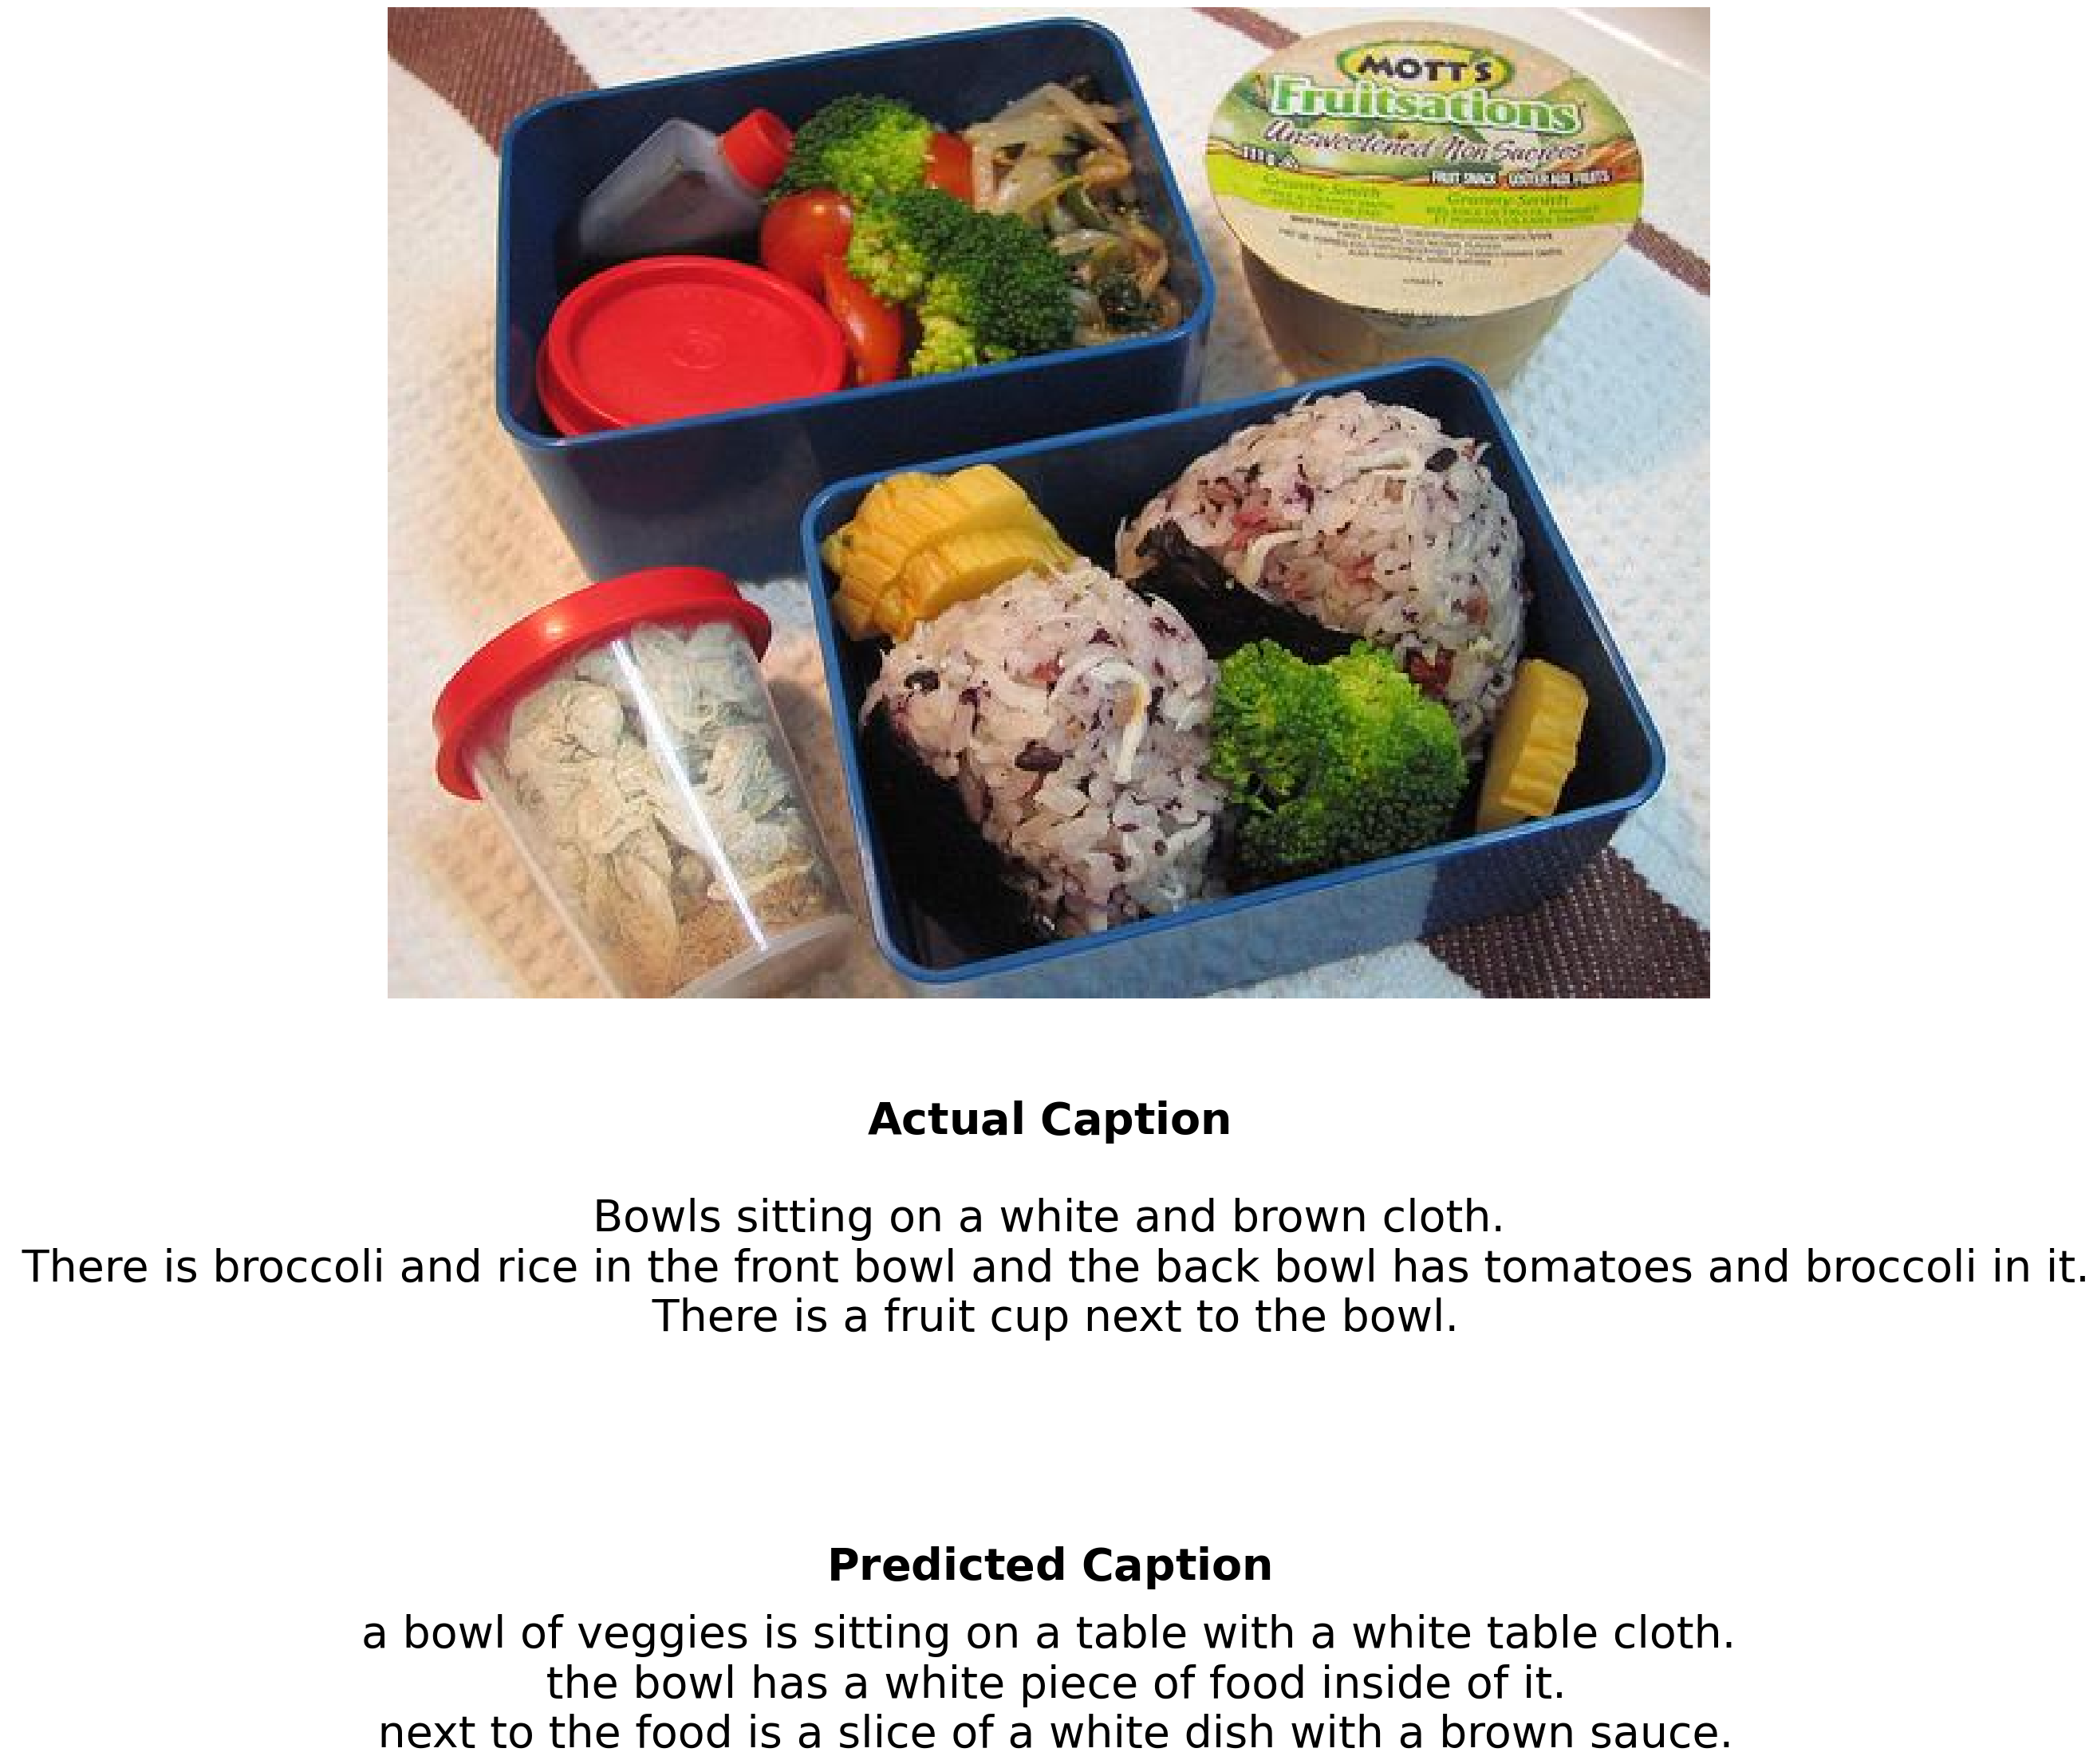

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

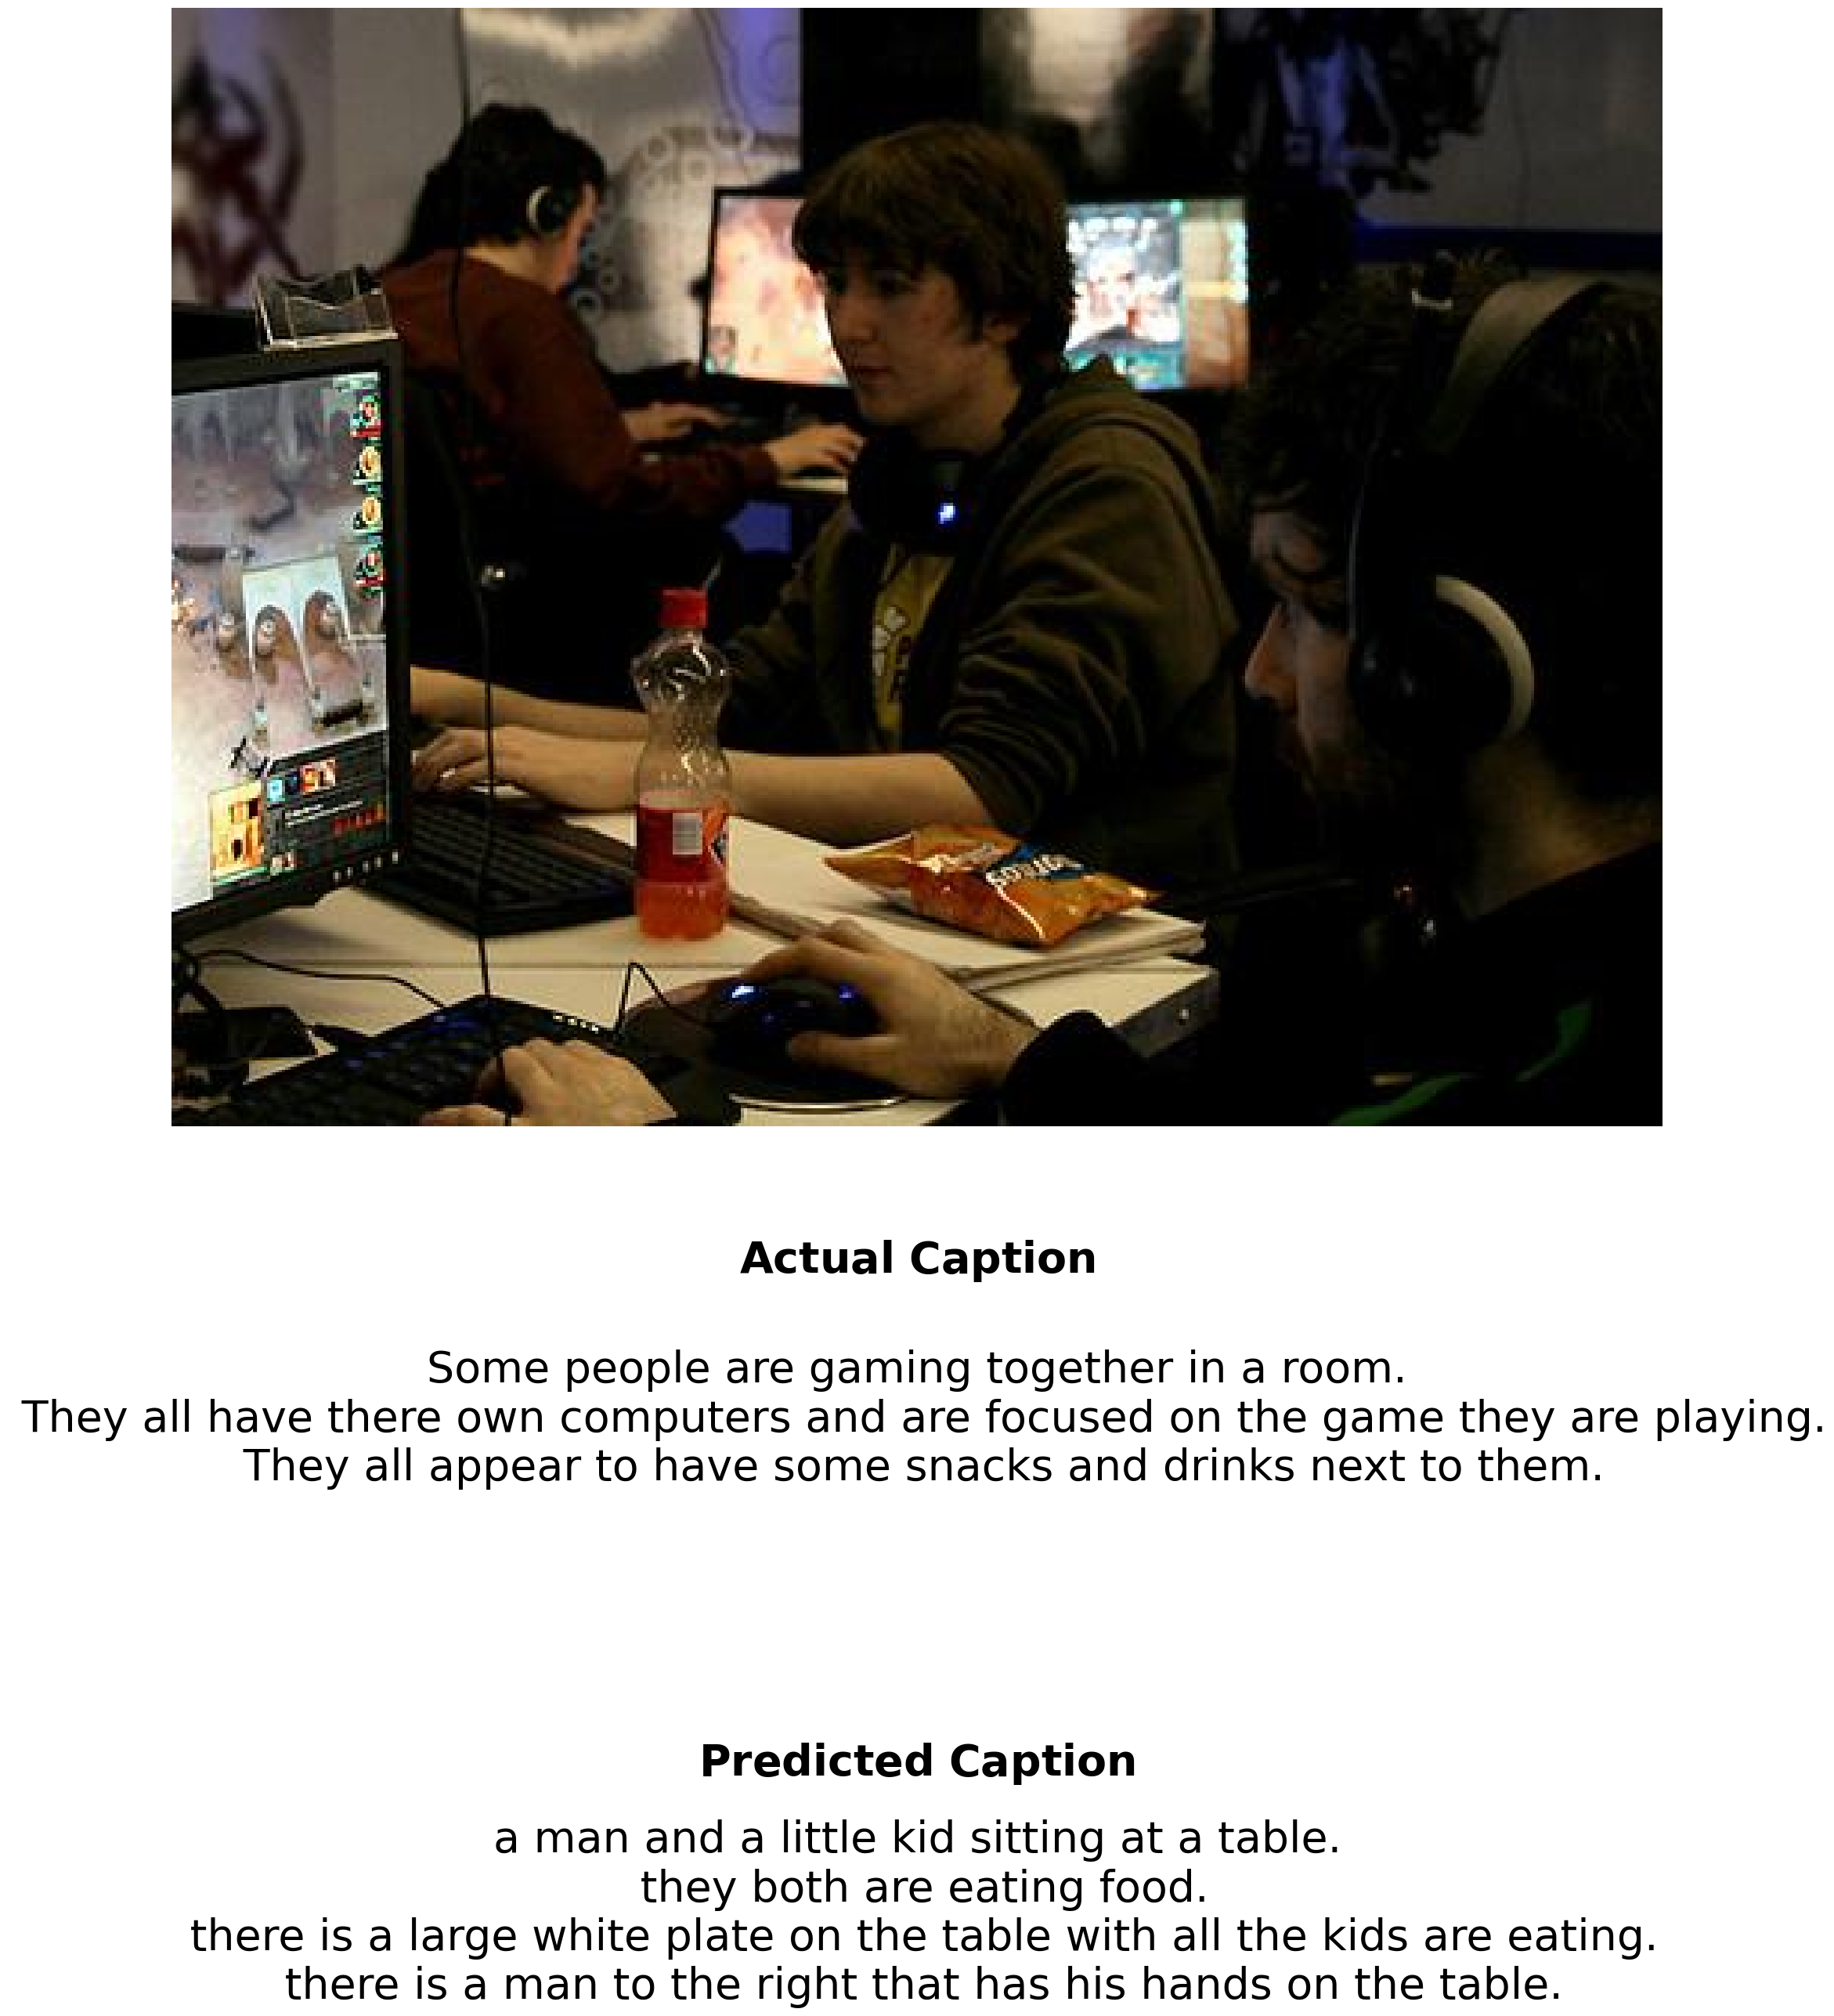

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

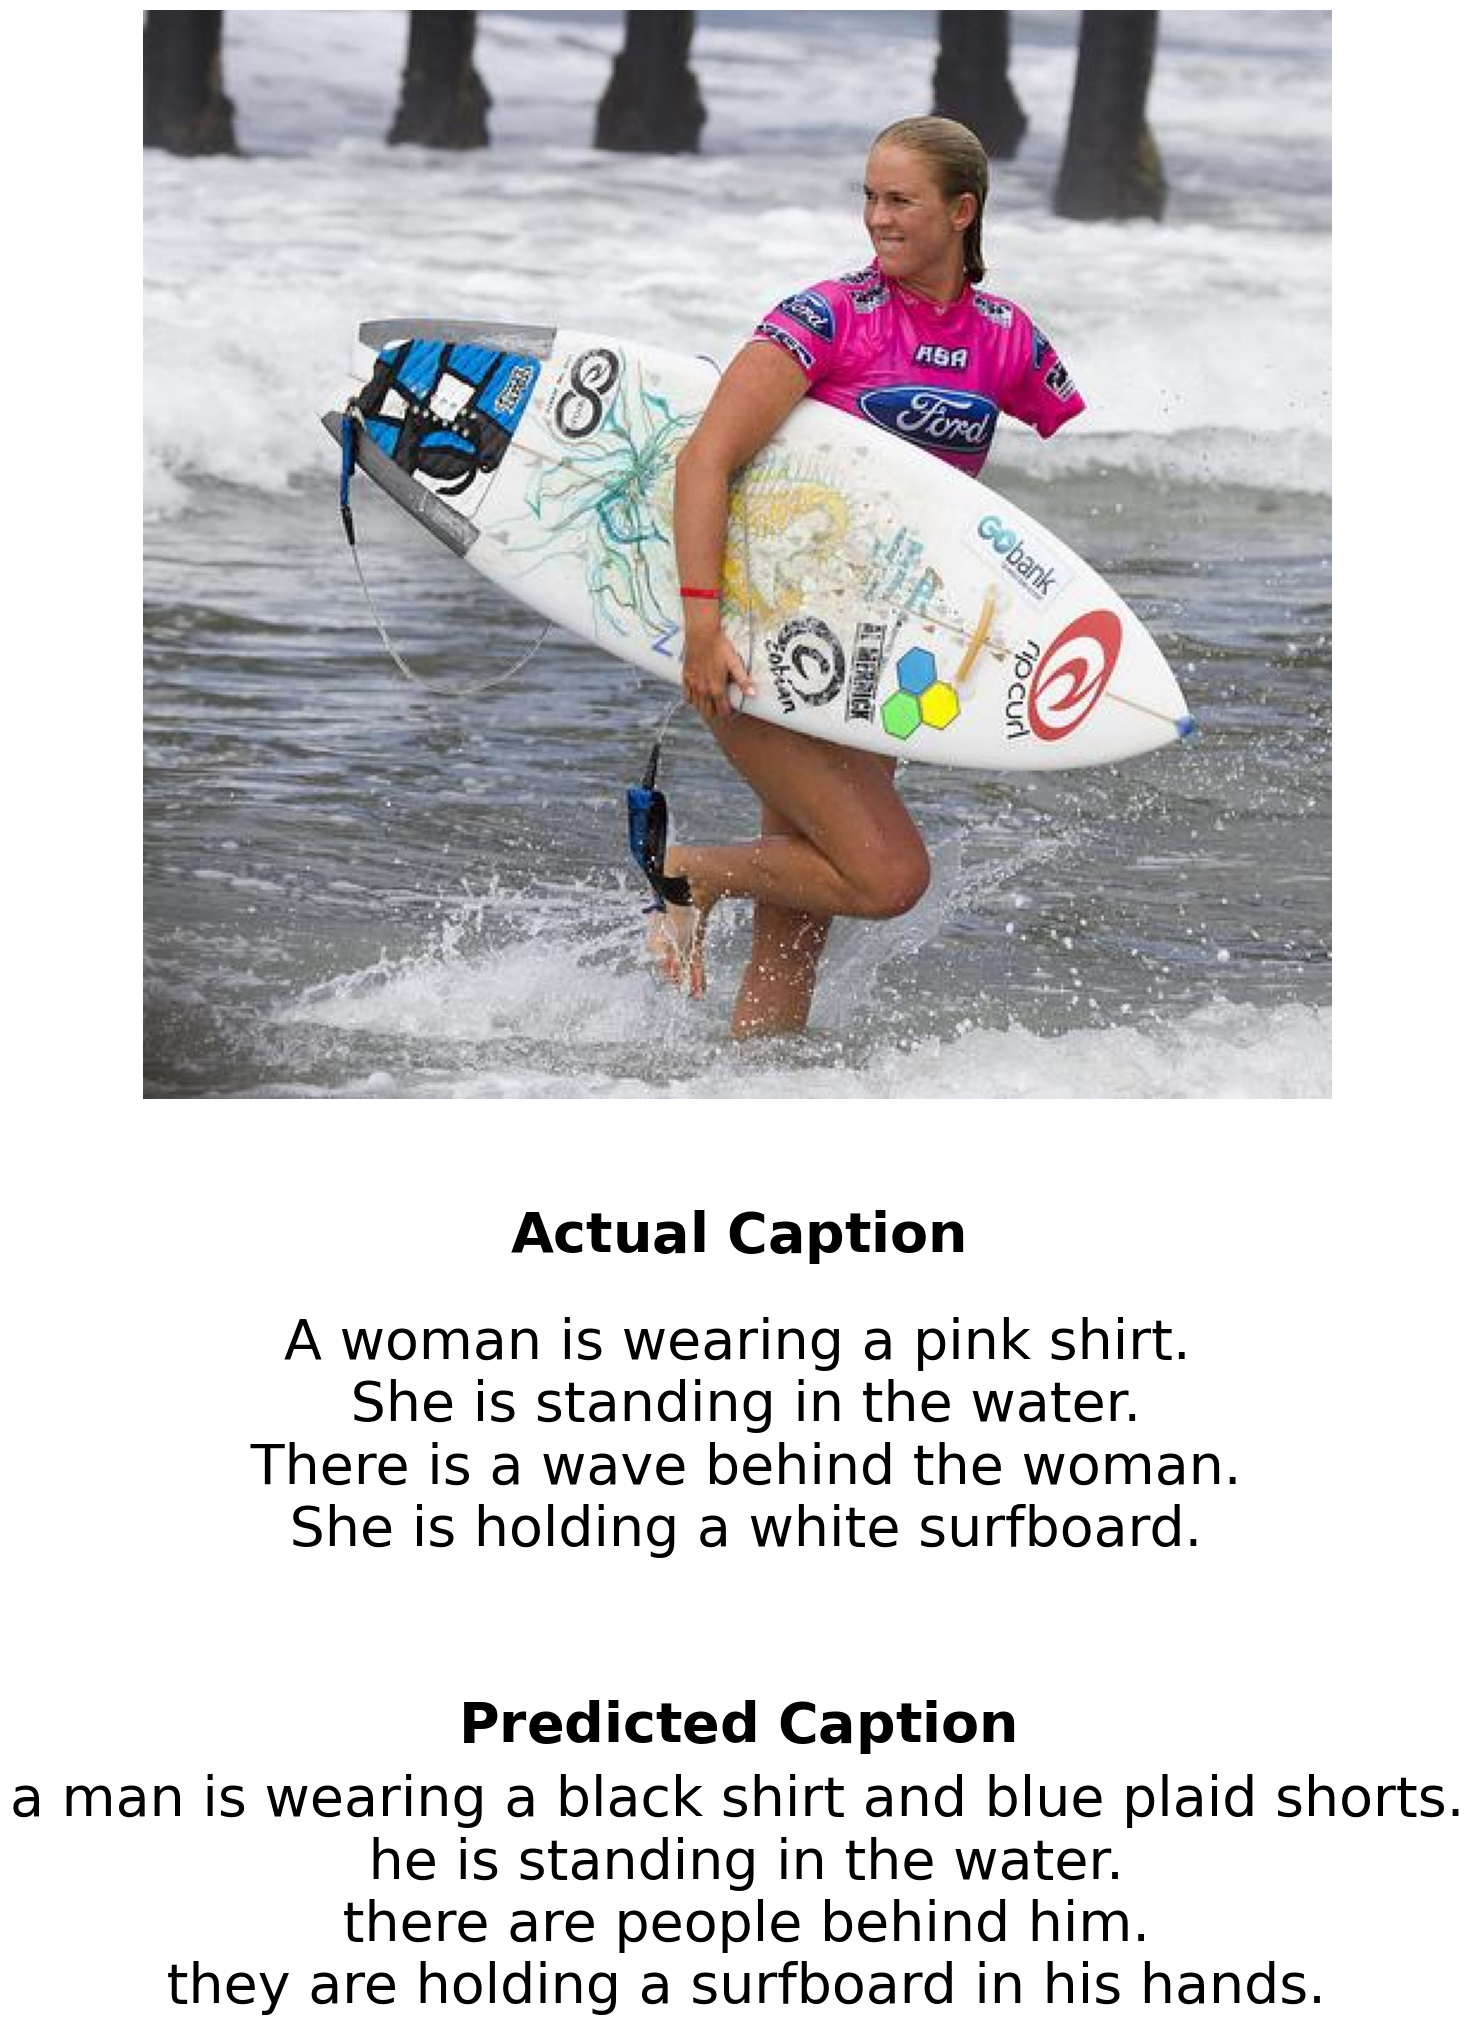

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

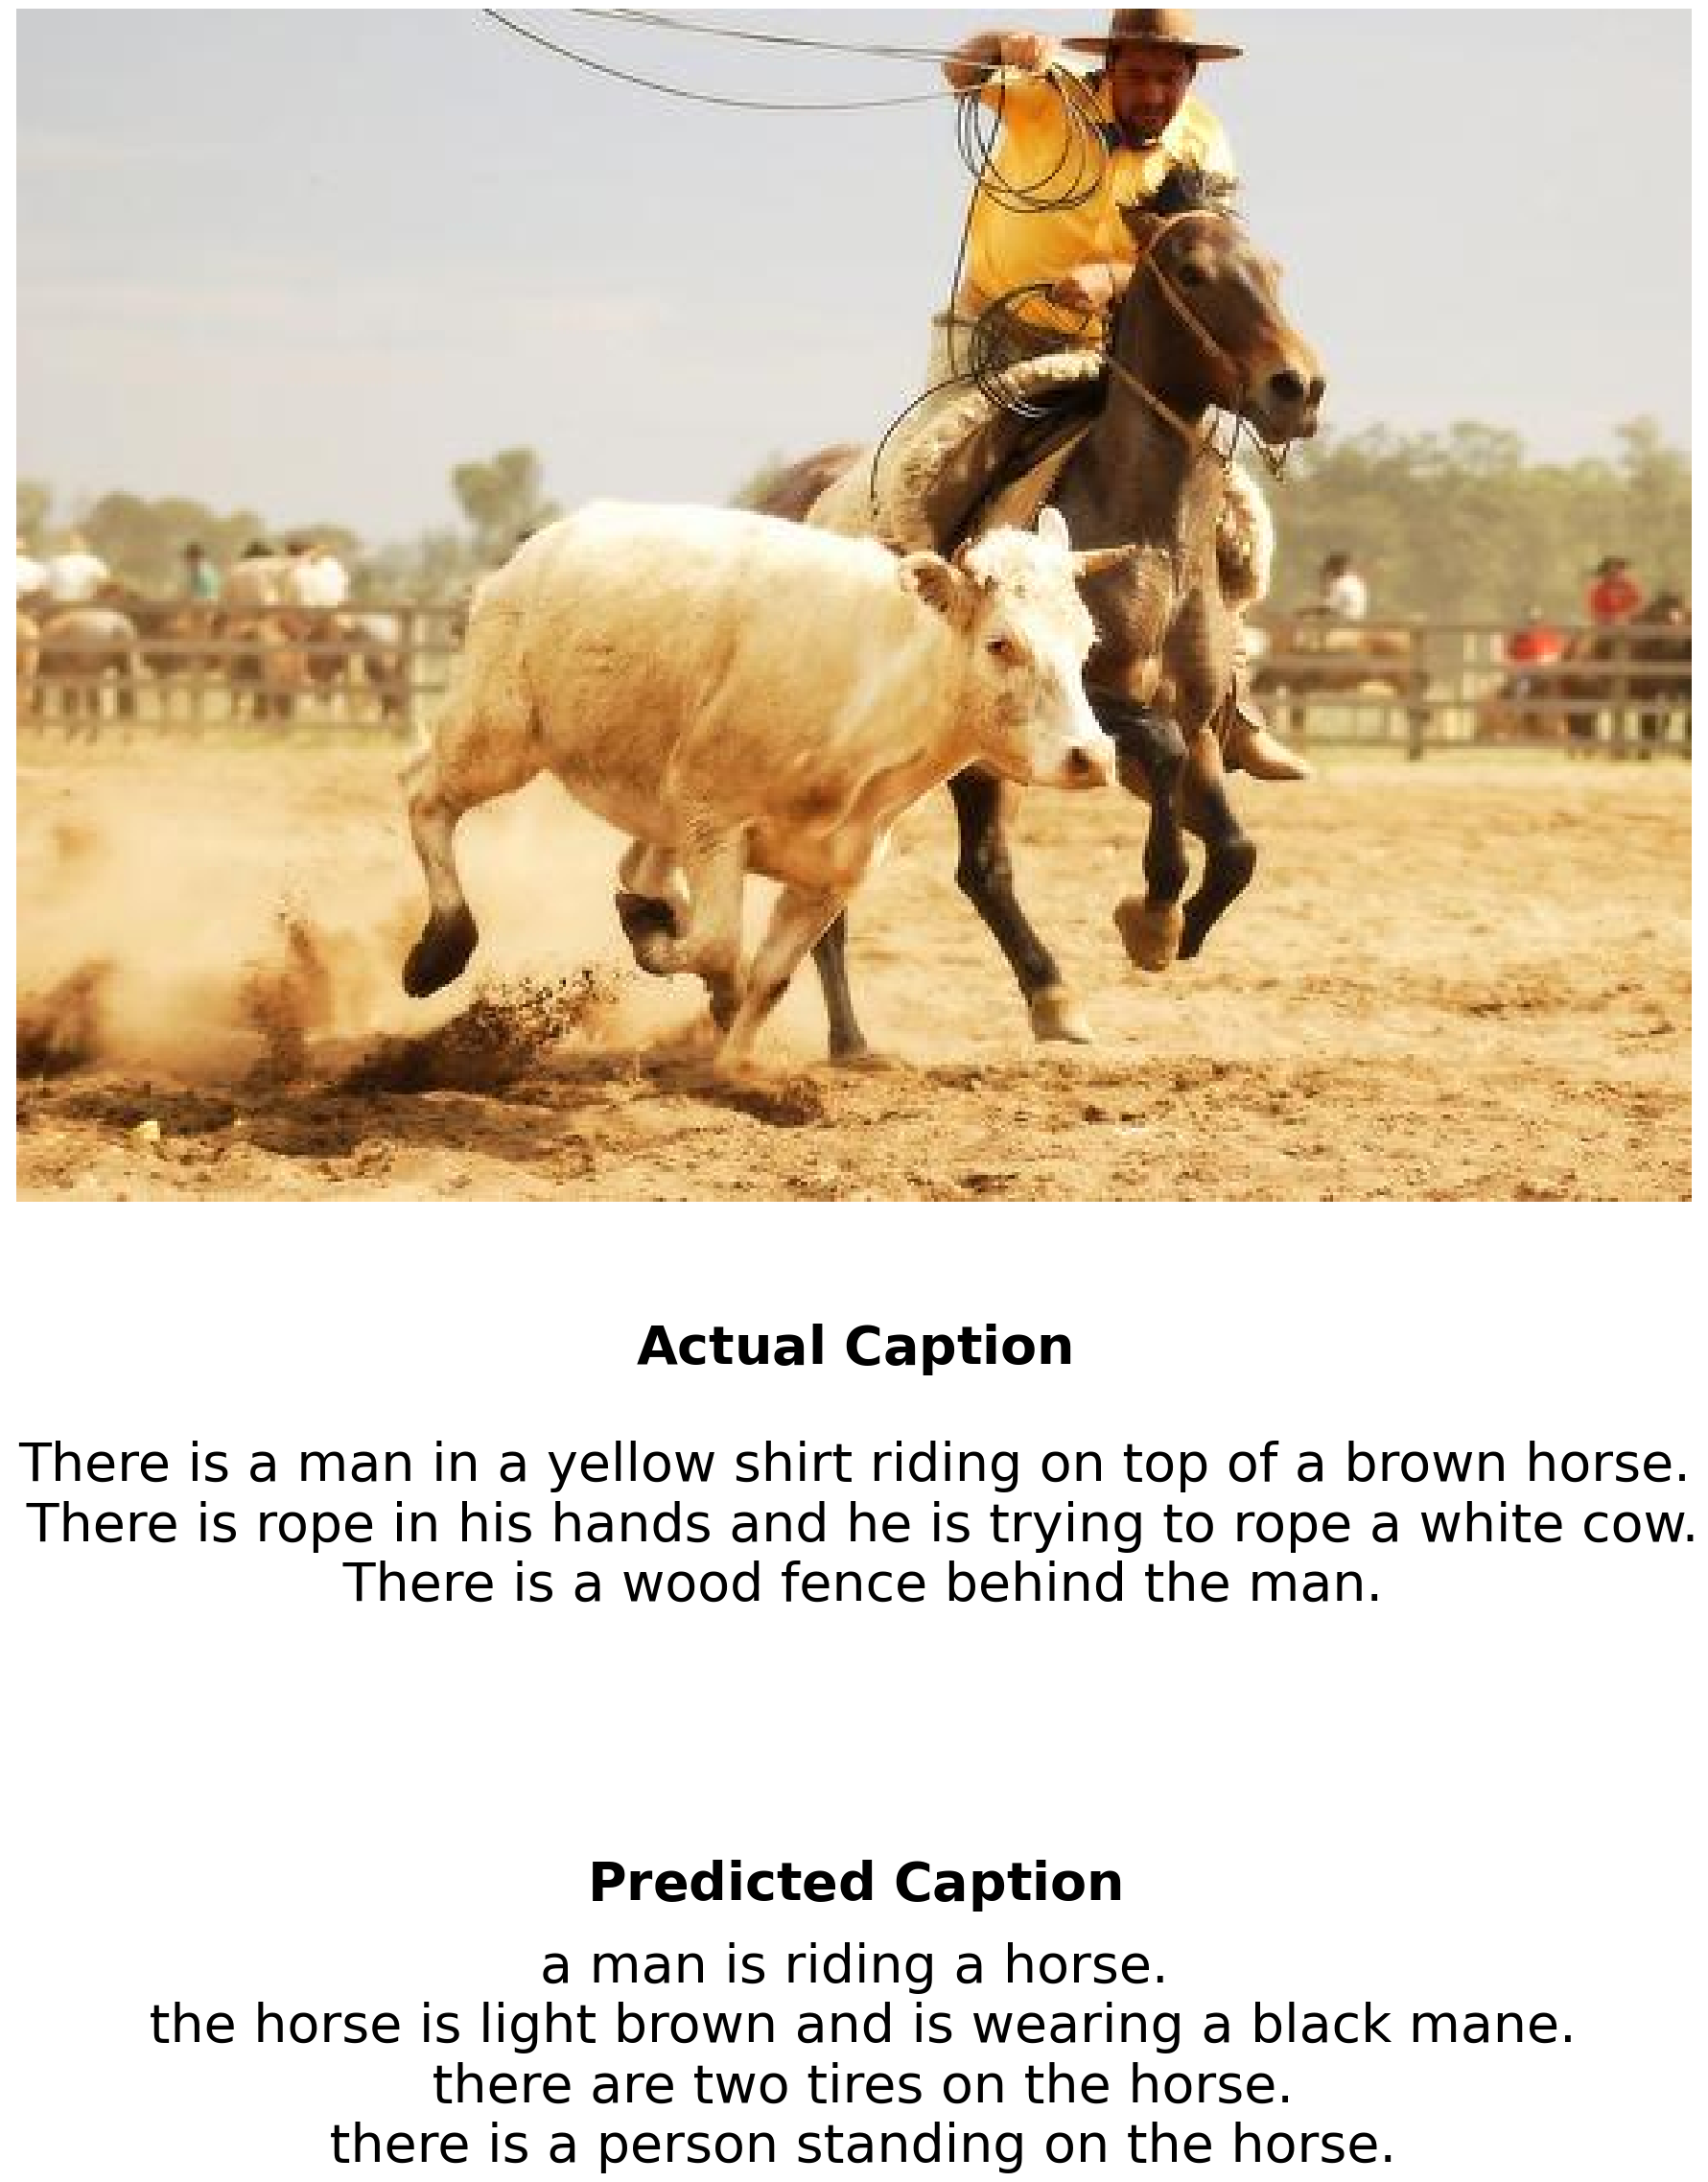

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

### **Caption Visualization Script for Comparing Actual and Predicted Captions**

This Python script utilizes pandas to read a CSV file containing actual and predicted captions, preprocesses the captions for display, and defines a function to randomly select and visualize an image alongside its corresponding caption. This tool is designed to aid in comparing actual and predicted captions in machine learning or image processing tasks.

In [1]:
import pandas as pd

df =  pd.read_csv("/var/Task_2_predictions.csv") # prediction.csv has actual and prediction columns where each entry has actual caption and its predicted caption

actual = df["actual"]

predictions = df["prediction"]

prepaired_pred =[]
prepaired_actual=[]
for pred in predictions:
  pred= pred.replace("\n","")
  prepaired_pred.append(pred)

for pred in actual:
  pred= pred.replace("\n","")
  prepaired_actual.append(pred)

In [4]:
import evaluate
from cidereval import cider

cider_scores = cider(predictions=prepaired_pred, references=prepaired_actual)
# Extract the average CIDEr score from the cider_scores dictionary-like object
cider_scorer = cider_scores['avg_score']


# Load the BLEU evaluation metric
bleu = evaluate.load("bleu")
rouge = evaluate.load('rouge')

# Compute the BLEU score
results_bleu = bleu.compute(predictions=prepaired_pred, references=prepaired_actual)

results_rouge = rouge.compute(predictions=prepaired_pred, references=prepaired_actual)

# Print the results
# Print the average CIDEr score
print("CIDEr score:", cider_scorer)
print("bleu Metrix  :",results_bleu)
print("Rouge Metrix  :",results_rouge)

CIDEr score: 0.0003085113951411365
bleu Metrix  : {'bleu': 0.03508050068639116, 'precisions': [0.4898969177906559, 0.12080378250591016, 0.03225459049054978, 0.0092505660794168], 'brevity_penalty': 0.5411647657209171, 'length_ratio': 0.6195665988815455, 'translation_length': 38998, 'reference_length': 62944}
Rouge Metrix  : {'rouge1': 0.3757931601603407, 'rouge2': 0.11346597063363487, 'rougeL': 0.26087549456180426, 'rougeLsum': 0.2608056781762207}


### **Task 2 Evaluation Results**

- **CIDEr Score:** 0.00031
- **BLEU Metric:**
  - BLEU Score: 0.035
  - Precisions: [0.49, 0.12, 0.03, 0.009]
  - Brevity Penalty: 0.541
  - Length Ratio: 0.620
  - Translation Length: 38998
  - Reference Length: 62944
- **ROUGE Metric:**
  - ROUGE-1: 0.376
  - ROUGE-2: 0.113
  - ROUGE-L: 0.261
  - ROUGE-Lsum: 0.261
